In [1]:
%cd C:\Users\mceau\Documents\fiberphotopy\fiberphotopy\

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [61]:
import pandas as pd
import fp_utils, behavioral_data, analysis, fiber_data
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import importlib
import yaml
import time
def rel():
    for module in [fp_utils, behavioral_data, analysis, fiber_data]:
        importlib.reload(module)
rel()
plt.style.use('dark_background')

# QUESTIONS: 
+ np1 or np1and2
+ avg for all sessions
+ include all sessions ?
+ what to do about ND,NCI, etc
+ is NCI BSL == SA
+ what to do if no D2

# TODO:
Have a way to :
- [X] get ID
- [ ]

## Make df with (first per session):
### Behavioral data:
- [ ] total ND1 nosepokes (get then median, etc)
- [ ] 1 min ND1 nosepokes
- [ ] latencies to first ND1 np
- [ ] injections in D1
- [ ] latency to first D2 np
- [ ] injections in D2
- [ ] latency to first D1 np

### Fiber data:
- [ ] D1/ND1 -- dF/Z -- avg, AUC -- (1,3,5)
- [ ] -D1    -- dF/Z -- avg, AUC -- (1,3,5)
- [ ] D amplitude  -- frequency
- [ ] ND amplitude -- frequency
________________________________________________________________________________________________________________________________________________________________________________
# DETAILS

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and total ND1 nosepokes**
+ 1s, 3s, 5s
total ND1 ======= ok
ND1_switch ====== ok

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and 1 min ND1 nosepokes**
+ 1s, 3s, 5s
1min ND1 NP ===== ok 

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and latency to first ND nosepoke**
+ 1s, 3s, 5s
latency to first ND ==== ok with user output abs(timestamps('switch_1')[0] - ND_1[0][0]) 

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and inj in previous D period- controlling that the recruitment does not depend on how much cocaine is in the system**
+ 1s, 3s, 5s
injection during previous D period ===== timestamps('inj1','D_1')

**Split rats into high/low based on ND1 median split**
+ Peak amplitude/frequency differences D / ND 
ND1 median split ======== len('np1','ND_1')/median avg by session ?

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first D nosepoke**
+ 1s, 3s, 5s
-DS switch ============= start of first D?
latency to first ========== shoudl be easy 

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first injection**
+ 1s, 3s, 5s

**Correlation between normalized -D1 DS switch Z-score/ Df/f and number of injections in D1**
+ 1s, 3s, 5s
=== number of injections in D1 

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first D2 nosepoke**
+ 1s, 3s, 5s
===== latency to first D2 nosepoke (might be some np.nan)

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first injection D2**
+ 1s, 3s, 5s
===== latency to first D2 injection (might be some np.nan)

**Correlation between normalized -D1 DS switch Z-score/ Df/f and number of injections in D1**
+ 1s, 3s, 5s


In [3]:
rel()
s = analysis.MultiSession('../../DATA/FIBER')


folder ../../DATA/FIBER
Folder is indeed a string
rats ['AD21R_rat_2_SA_j23', 'AD21R_rat_2_SA_j42', 'AD21R_rat_2_SA_j51', 'AK20R_rat_3_SA_j17', 'AK20R_rat_3_SA_j18', 'AK20R_rat_4_SA_j16', 'AK20R_rat_4_SA_j17', 'AL21R_rat_12_NCIBSL_j36', 'AL21R_rat_12_NDPre20_j31', 'AL21R_rat_12_NDPre_j28', 'AL21R_rat_12_SA_j24', 'AL21R_rat_2_NCIBSL_j38', 'AL21R_rat_2_NDPre20_j36', 'AL21R_rat_2_NDPre_j29', 'AL21R_rat_3_NCIBSL_j37', 'AL21R_rat_3_NDPre20_j32', 'AL21R_rat_3_NDPre_j28', 'AL21R_rat_3_SA_j23', 'AL21R_rat_6_NDPre20_j34', 'AL21R_rat_6_NDPre_j28', 'AL21R_rat_6_SA_j24', 'AL21R_rat_8_NCIBSL_j39', 'AL21R_rat_8_NDPre20_j32', 'AL21R_rat_8_NDPre_j29', 'AL21R_rat_9_NDPre20_j36', 'AL21R_rat_9_NDPre_j29', 'AL21R_rat_9_SA_j22', 'AL21R_rat_9_SA_j26', 'AS21R_rat_10_SA1_j22', 'AS21R_rat_10_SA2', 'AS21R_rat_11_BSL_j42', 'AS21R_rat_11_BSL_j45', 'AS21R_rat_11_SA1', 'AS21R_rat_11_SA2', 'AS21R_rat_11_SA3_j29', 'AS21R_rat_11_SA4', 'AS21R_rat_11_SA5_j33', 'AS21R_rat_11_SA6_j36', 'AS21R_rat_11_SA7', 'AS21R_rat_11_SA

C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


09:48:21 --- Normalizing recording 2 with method 'F'
09:48:21 --- 
09:48:22 --- Normalizing recording 3 with method 'F'
09:48:22 --- 
09:48:22 --- Normalizing recording 4 with method 'F'
09:48:22 --- 
09:48:22 --- Importing of ../../DATA/FIBER/AD21R_rat_2_SA_j23/AD21RSA1RAT215072021_0.csv finished in 1.4041337966918945 seconds
09:48:22 --- 
Importing folder AD21R_rat_2_SA_j42...
09:48:22 --- IMPORTING ../../DATA/FIBER/AD21R_rat_2_SA_j42/bsa11082021c20_01.dat...
09:48:22 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:22 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:22 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:22 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:22 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:48:22 --- Detecting led2_off...                     ['conditional', [1, 3], 

09:48:25 --- 
09:48:25 --- Normalizing recording 3 with method 'F'
09:48:25 --- 
09:48:26 --- Normalizing recording 4 with method 'F'
09:48:26 --- 
09:48:26 --- Normalizing recording 5 with method 'F'
09:48:26 --- 
09:48:26 --- Importing of ../../DATA/FIBER/AD21R_rat_2_SA_j51/AD21RSARAT225082021_0.csv finished in 1.943800687789917 seconds
09:48:26 --- 
Importing folder AK20R_rat_3_SA_j17...
09:48:26 --- IMPORTING ../../DATA/FIBER/AK20R_rat_3_SA_j17/bsa19112020c20_01.dat...
09:48:26 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:26 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:26 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:26 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:26 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:48:26 --- Detecting led2_off...                     ['conditiona

09:48:28 --- 
09:48:28 --- Normalizing recording 3 with method 'F'
09:48:28 --- 
09:48:28 --- Normalizing recording 4 with method 'F'
09:48:28 --- 
09:48:29 --- Importing of ../../DATA/FIBER/AK20R_rat_3_SA_j18/rat 3 AK20R SESSION 20 11 2020_0.csv finished in 1.2582242488861084 seconds
09:48:29 --- 
Importing folder AK20R_rat_4_SA_j16...
09:48:29 --- IMPORTING ../../DATA/FIBER/AK20R_rat_4_SA_j16/bsa18112020c20_03.dat...
09:48:29 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:29 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:29 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:29 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:29 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:48:29 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:48:29 --- Detecting np1...  

09:48:31 --- 
09:48:31 --- Normalizing recording 4 with method 'F'
09:48:31 --- 
09:48:31 --- Importing of ../../DATA/FIBER/AK20R_rat_4_SA_j17/rat 4 AK20R SESSION 19 11 2020_0.csv finished in 1.3421719074249268 seconds
09:48:31 --- 
Importing folder AL21R_rat_12_NCIBSL_j36...
09:48:31 --- IMPORTING ../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/bsa30112021c20_01.dat...
09:48:31 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:31 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:31 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:31 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:31 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:48:31 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:48:31 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]

09:48:37 --- Found 3 separate recordings.
09:48:37 --- Analyzing peaks...
09:48:37 --- Normalizing recording 1 with method 'F'
09:48:37 --- 
09:48:38 --- Normalizing recording 2 with method 'F'
09:48:38 --- 
09:48:38 --- Normalizing recording 3 with method 'F'
09:48:38 --- 
09:48:38 --- Importing of ../../DATA/FIBER/AL21R_rat_12_NDPre_j28/AL21Rrat12NDPRE118112021_0.csv finished in 1.2142515182495117 seconds
09:48:38 --- 
Importing folder AL21R_rat_12_SA_j24...
09:48:38 --- IMPORTING ../../DATA/FIBER/AL21R_rat_12_SA_j24/bsa12112021c20_03.dat...
09:48:38 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:38 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:38 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:38 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:38 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 

09:48:43 --- Found 4 separate recordings.
09:48:43 --- Analyzing peaks...
09:48:43 --- Normalizing recording 1 with method 'F'
09:48:43 --- 
09:48:44 --- Normalizing recording 2 with method 'F'
09:48:44 --- 
09:48:44 --- Normalizing recording 3 with method 'F'
09:48:44 --- 
09:48:44 --- Normalizing recording 4 with method 'F'
09:48:44 --- 
09:48:44 --- Importing of ../../DATA/FIBER/AL21R_rat_2_NDPre20_j36/AL21Rrat2NDPRE330112021_0.csv finished in 1.2262442111968994 seconds
09:48:44 --- 
Importing folder AL21R_rat_2_NDPre_j29...
09:48:44 --- IMPORTING ../../DATA/FIBER/AL21R_rat_2_NDPre_j29/bsa19112021c20_01.dat...
09:48:44 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:44 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:44 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:44 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:44 --- De

09:48:49 --- Importing of ../../DATA/FIBER/AL21R_rat_3_NCIBSL_j37/AL21Rrat3nciBSL101122021_0.csv finished in 3.5548079013824463 seconds
09:48:49 --- 
Importing folder AL21R_rat_3_NDPre20_j32...
09:48:49 --- IMPORTING ../../DATA/FIBER/AL21R_rat_3_NDPre20_j32/bsa24112021c20_01.dat...
09:48:49 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:49 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:49 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:49 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:49 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:48:49 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:48:49 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
09:48:49 --- Detecting np2...                          ['conditional', [3, 2], [

09:48:52 --- Found 5 separate recordings.
09:48:52 --- Analyzing peaks...
09:48:53 --- Normalizing recording 1 with method 'F'
09:48:53 --- 
09:48:53 --- Normalizing recording 2 with method 'F'
09:48:53 --- 
09:48:53 --- Normalizing recording 3 with method 'F'
09:48:53 --- 
09:48:53 --- Normalizing recording 4 with method 'F'
09:48:53 --- 
09:48:54 --- Normalizing recording 5 with method 'F'
09:48:54 --- 
09:48:54 --- Importing of ../../DATA/FIBER/AL21R_rat_3_SA_j23/AL21Rrat3SA111112021_0.csv finished in 2.292585611343384 seconds
09:48:54 --- 
Importing folder AL21R_rat_6_NDPre20_j34...
09:48:54 --- IMPORTING ../../DATA/FIBER/AL21R_rat_6_NDPre20_j34/bsa26112021c20_02.dat...
09:48:54 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:54 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:54 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:54 --- Detecting led1_off...          

09:48:56 --- Found 3 separate recordings.
09:48:56 --- Analyzing peaks...
09:48:56 --- Normalizing recording 1 with method 'F'
09:48:56 --- 
09:48:56 --- Normalizing recording 2 with method 'F'
09:48:56 --- 
09:48:56 --- Normalizing recording 3 with method 'F'
09:48:56 --- 
09:48:56 --- Importing of ../../DATA/FIBER/AL21R_rat_6_NDPre_j28/AL21Rrat6NDPRE118112021_0.csv finished in 1.177274465560913 seconds
09:48:56 --- 
Importing folder AL21R_rat_6_SA_j24...
09:48:56 --- IMPORTING ../../DATA/FIBER/AL21R_rat_6_SA_j24/bsa12112021c20_01.dat...
09:48:56 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:48:56 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:48:56 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:48:56 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:48:56 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])


09:49:02 --- Importing of ../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/AL21Rrat8nciBSL03122021_0.csv finished in 3.5438148975372314 seconds
09:49:02 --- 
Importing folder AL21R_rat_8_NDPre20_j32...
09:49:02 --- IMPORTING ../../DATA/FIBER/AL21R_rat_8_NDPre20_j32/bsa24112021c20_03.dat...
09:49:02 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:02 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:02 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:02 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:02 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:02 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:02 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
09:49:02 --- Detecting np2...                          ['conditional', [3, 2], ['

09:49:05 --- Found 4 separate recordings.
09:49:05 --- Analyzing peaks...
09:49:05 --- Normalizing recording 1 with method 'F'
09:49:05 --- 
09:49:05 --- Normalizing recording 2 with method 'F'
09:49:05 --- 
09:49:06 --- Normalizing recording 3 with method 'F'
09:49:06 --- 
09:49:06 --- Normalizing recording 4 with method 'F'
09:49:06 --- 
09:49:06 --- Importing of ../../DATA/FIBER/AL21R_rat_9_NDPre20_j36/AL21Rrat9NDPRE330112021_0.csv finished in 1.2502295970916748 seconds
09:49:06 --- 
Importing folder AL21R_rat_9_NDPre_j29...
09:49:06 --- IMPORTING ../../DATA/FIBER/AL21R_rat_9_NDPre_j29/bsa19112021c20_03.dat...
09:49:06 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:06 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:06 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:06 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:06 --- De

09:49:08 --- 
09:49:09 --- Normalizing recording 3 with method 'F'
09:49:09 --- 
09:49:09 --- Normalizing recording 4 with method 'F'
09:49:09 --- 
09:49:09 --- Normalizing recording 5 with method 'F'
09:49:09 --- 
09:49:09 --- Importing of ../../DATA/FIBER/AL21R_rat_9_SA_j22/AL21Rrat9SA110112021_0.csv finished in 1.965787410736084 seconds
09:49:09 --- 
Importing folder AL21R_rat_9_SA_j26...
09:49:09 --- IMPORTING ../../DATA/FIBER/AL21R_rat_9_SA_j26/bsa16112021c20_03.dat...
09:49:09 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:09 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:09 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:09 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:09 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:09 --- Detecting led2_off...                     ['condition

09:49:13 --- Normalizing recording 2 with method 'F'
09:49:13 --- 
09:49:13 --- Normalizing recording 3 with method 'F'
09:49:13 --- 
09:49:13 --- Normalizing recording 4 with method 'F'
09:49:13 --- 
09:49:13 --- Normalizing recording 5 with method 'F'
09:49:13 --- 
09:49:13 --- Importing of ../../DATA/FIBER/AS21R_rat_10_SA1_j22/AS21RSA1Rat1002032022_0.csv finished in 2.1656641960144043 seconds
09:49:13 --- 
Importing folder AS21R_rat_10_SA2...
09:49:13 --- IMPORTING ../../DATA/FIBER/AS21R_rat_10_SA2/bsa08032022c20_02.dat...
09:49:13 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:13 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:13 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:13 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:13 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:13 --- 

09:49:19 --- Found 1 separate recordings.
09:49:19 --- Analyzing peaks...
09:49:19 --- Normalizing recording 1 with method 'F'
09:49:19 --- 
09:49:22 --- Importing of ../../DATA/FIBER/AS21R_rat_11_BSL_j45/AS21RNDBSL3Rat1105042022_0.csv finished in 3.5697989463806152 seconds
09:49:22 --- 
Importing folder AS21R_rat_11_SA1...
09:49:22 --- IMPORTING ../../DATA/FIBER/AS21R_rat_11_SA1/bsa03032022c20_01.dat...
09:49:22 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:22 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:22 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:22 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:22 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:22 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:22 --- Detecting np1...                 

09:49:25 --- 
09:49:25 --- Normalizing recording 3 with method 'F'
09:49:25 --- 
09:49:25 --- Normalizing recording 4 with method 'F'
09:49:25 --- 
09:49:25 --- Importing of ../../DATA/FIBER/AS21R_rat_11_SA2/AS21RSA2Rat1109032022_0.csv finished in 1.3001980781555176 seconds
09:49:25 --- 
Importing folder AS21R_rat_11_SA3_j29...
09:49:25 --- IMPORTING ../../DATA/FIBER/AS21R_rat_11_SA3_j29/bsa11032022c20_01.dat...
09:49:25 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:25 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:25 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:25 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:25 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:25 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:25 --- Detecting np1...         

09:49:29 --- Normalizing recording 3 with method 'F'
09:49:29 --- 
09:49:29 --- Normalizing recording 4 with method 'F'
09:49:29 --- 
09:49:29 --- Normalizing recording 5 with method 'F'
09:49:29 --- 
09:49:29 --- Importing of ../../DATA/FIBER/AS21R_rat_11_SA4/AS21RSA4Rat1115032022_0.csv finished in 2.0077614784240723 seconds
09:49:29 --- 
Importing folder AS21R_rat_11_SA5_j33...
09:49:29 --- IMPORTING ../../DATA/FIBER/AS21R_rat_11_SA5_j33/bsa17032022c20_01.dat...
09:49:29 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:29 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:29 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:29 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:29 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:29 --- Detecting led2_off...                     ['conditional', [1, 3

09:49:33 --- 
09:49:33 --- Normalizing recording 3 with method 'F'
09:49:33 --- 
09:49:33 --- Normalizing recording 4 with method 'F'
09:49:33 --- 
09:49:33 --- Normalizing recording 5 with method 'F'
09:49:33 --- 
09:49:33 --- Importing of ../../DATA/FIBER/AS21R_rat_11_SA6_j36/AS21RSA6Rat1122032022_0.csv finished in 1.9547953605651855 seconds
09:49:34 --- 
Importing folder AS21R_rat_11_SA7...
09:49:34 --- IMPORTING ../../DATA/FIBER/AS21R_rat_11_SA7/bsa24032022c20_01.dat...
09:49:34 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:34 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:34 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:34 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:34 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:34 --- Detecting led2_off...                     ['condition

09:49:36 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:36 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:36 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:36 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
09:49:36 --- Detecting np2...                          ['conditional', [3, 2], ['_V', 1]])
09:49:36 --- Detecting inj1...                         ['conditional', [6, 1], ['_L', 1]])
09:49:36 --- Detecting ttl1_on...                      ['conditional', [15, 1], ['_L', 1]])
09:49:36 --- Detecting ttl1_off...                     ['conditional', [15, 1], ['_L', 0]])
09:49:36 --- Detecting x_coordinates...                ['simple', [9, 1], '_Y'])
09:49:36 --- Detecting xy_timestamps...                ['simple', [9, 1], 'TIME'])
09:49:36 --- Detecting HLED...                         ['ON_OFF', 'both', ['hled_on', 'hled_off']])
09:49:

09:49:44 --- Found 1 separate recordings.
09:49:44 --- Analyzing peaks...
09:49:44 --- Normalizing recording 1 with method 'F'
09:49:44 --- 
09:49:47 --- Importing of ../../DATA/FIBER/AS21R_rat_12_BSL_j46/AS21RBSL4Rat1207042022_0.csv finished in 3.7366950511932373 seconds
09:49:47 --- 
Importing folder AS21R_rat_12_SA1...
09:49:47 --- IMPORTING ../../DATA/FIBER/AS21R_rat_12_SA1/bsa01032022c20_02.dat...
09:49:47 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:47 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:47 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:47 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:47 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:47 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:47 --- Detecting np1...                   

09:49:50 --- 
09:49:50 --- Normalizing recording 5 with method 'F'
09:49:50 --- 
09:49:50 --- Importing of ../../DATA/FIBER/AS21R_rat_12_SA2_j24/AS21RSA2Rat1204032022_0.csv finished in 2.0277490615844727 seconds
09:49:50 --- 
Importing folder AS21R_rat_12_SA3_j26...
09:49:50 --- IMPORTING ../../DATA/FIBER/AS21R_rat_12_SA3_j26/bsa08032022c20_01.dat...
09:49:50 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:50 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:50 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:50 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:49:50 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:49:50 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:49:50 --- Detecting np1...                          ['conditional', [3, 1], ['_V', 1]])
09:49:50 -

09:49:53 --- Found 5 separate recordings.
09:49:53 --- Analyzing peaks...
09:49:53 --- Normalizing recording 1 with method 'F'
09:49:53 --- 
09:49:54 --- Normalizing recording 2 with method 'F'
09:49:54 --- 
09:49:54 --- Normalizing recording 3 with method 'F'
09:49:54 --- 
09:49:54 --- Normalizing recording 4 with method 'F'
09:49:54 --- 
09:49:54 --- Normalizing recording 5 with method 'F'
09:49:54 --- 
09:49:54 --- Importing of ../../DATA/FIBER/AS21R_rat_12_SA5_j32/AS21RSA5Rat1216032022_0.csv finished in 1.926811695098877 seconds
09:49:54 --- 
Importing folder AS21R_rat_12_SA6_j36...
09:49:54 --- IMPORTING ../../DATA/FIBER/AS21R_rat_12_SA6_j36/bsarat12_22032022c20_01.dat...
09:49:55 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:55 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:55 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:55 --- Detecting led1_off...       

09:49:57 --- Found 5 separate recordings.
09:49:57 --- Analyzing peaks...
09:49:57 --- Normalizing recording 1 with method 'F'
09:49:57 --- 
09:49:58 --- Normalizing recording 2 with method 'F'
09:49:58 --- 
09:49:58 --- Normalizing recording 3 with method 'F'
09:49:58 --- 
09:49:58 --- Normalizing recording 4 with method 'F'
09:49:58 --- 
09:49:58 --- Normalizing recording 5 with method 'F'
09:49:58 --- 
09:49:59 --- Importing of ../../DATA/FIBER/AS21R_rat_12_SA7_j40/AS21RSA7Rat1228032022_0.csv finished in 2.0287487506866455 seconds
09:49:59 --- 
Importing folder AS21R_rat_3_SA1_j21...
09:49:59 --- IMPORTING ../../DATA/FIBER/AS21R_rat_3_SA1_j21/bsa01032022c20_01.dat...
09:49:59 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:49:59 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:49:59 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:49:59 --- Detecting led1_off...              

09:50:02 --- Found 5 separate recordings.
09:50:02 --- Analyzing peaks...
09:50:02 --- Normalizing recording 1 with method 'F'
09:50:02 --- 
09:50:02 --- Normalizing recording 2 with method 'F'
09:50:02 --- 
09:50:03 --- Normalizing recording 3 with method 'F'
09:50:03 --- 
09:50:03 --- Normalizing recording 4 with method 'F'
09:50:03 --- 
09:50:03 --- Normalizing recording 5 with method 'F'
09:50:03 --- 
09:50:03 --- Importing of ../../DATA/FIBER/AS21R_rat_3_SA2_j33/AS21RSA2Rat317032022_0.csv finished in 2.5844061374664307 seconds
09:50:03 --- 
Importing folder AS21R_rat_3_SA3...
09:50:03 --- IMPORTING ../../DATA/FIBER/AS21R_rat_3_SA3/bsa21032022c20_01.dat...
09:50:03 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:03 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:03 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:03 --- Detecting led1_off...                     ['c

09:50:06 --- Found 1 separate recordings.
09:50:06 --- Analyzing peaks...
09:50:06 --- Normalizing recording 1 with method 'F'
09:50:06 --- 
09:50:09 --- Importing of ../../DATA/FIBER/AS21R_rat_5_BSL_j42/AS21RSAxbaselineRat5_30032022_0.csv finished in 3.7326982021331787 seconds
09:50:09 --- 
Importing folder AS21R_rat_5_BSL_j45...
09:50:09 --- IMPORTING ../../DATA/FIBER/AS21R_rat_5_BSL_j45/rat505042022c20_01.dat...
09:50:09 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:09 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:09 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:09 --- Detecting led1_off...                     ['conditional', [1, 2], ['_P', 0]])
09:50:09 --- Detecting led2_on...                      ['conditional', [1, 3], ['_P', 1]])
09:50:09 --- Detecting led2_off...                     ['conditional', [1, 3], ['_P', 0]])
09:50:09 --- Detecting np1...      

09:50:16 --- Found 5 separate recordings.
09:50:16 --- Analyzing peaks...
09:50:16 --- Normalizing recording 1 with method 'F'
09:50:16 --- 
09:50:16 --- Normalizing recording 2 with method 'F'
09:50:16 --- 
09:50:16 --- Normalizing recording 3 with method 'F'
09:50:16 --- 
09:50:17 --- Normalizing recording 4 with method 'F'
09:50:17 --- 
09:50:17 --- Normalizing recording 5 with method 'F'
09:50:17 --- 
09:50:17 --- Importing of ../../DATA/FIBER/AS21R_rat_5_SA2_j28/AS21RSA2Rat510032022_0.csv finished in 1.9967684745788574 seconds
09:50:17 --- 
Importing folder AS21R_rat_5_SA3...
09:50:17 --- IMPORTING ../../DATA/FIBER/AS21R_rat_5_SA3/bsa11032022c20_02.dat...
09:50:17 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:17 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:17 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:17 --- Detecting led1_off...                     ['c

09:50:20 --- Found 5 separate recordings.
09:50:20 --- Analyzing peaks...
09:50:20 --- Normalizing recording 1 with method 'F'
09:50:20 --- 
09:50:20 --- Normalizing recording 2 with method 'F'
09:50:20 --- 
09:50:20 --- Normalizing recording 3 with method 'F'
09:50:20 --- 
09:50:20 --- Normalizing recording 4 with method 'F'
09:50:20 --- 
09:50:20 --- Normalizing recording 5 with method 'F'
09:50:20 --- 
09:50:21 --- Importing of ../../DATA/FIBER/AS21R_rat_5_SA4_j31/AS21RSA4Rat515032022_0.csv finished in 2.0180013179779053 seconds
09:50:21 --- 
Importing folder AS21R_rat_5_SA5_j35...
09:50:21 --- IMPORTING ../../DATA/FIBER/AS21R_rat_5_SA5_j35/bsarec121032022c20_01.dat...
09:50:21 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:21 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:21 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:21 --- Detecting led1_off...            

09:50:24 --- Found 5 separate recordings.
09:50:24 --- Analyzing peaks...
09:50:24 --- Normalizing recording 1 with method 'F'
09:50:24 --- 
09:50:24 --- Normalizing recording 2 with method 'F'
09:50:24 --- 
09:50:24 --- Normalizing recording 3 with method 'F'
09:50:24 --- 
09:50:25 --- Normalizing recording 4 with method 'F'
09:50:25 --- 
09:50:25 --- Normalizing recording 5 with method 'F'
09:50:25 --- 
09:50:25 --- Importing of ../../DATA/FIBER/AS21R_rat_5_SA6_j37/AS21RSA6Rat523032022_0.csv finished in 2.040776014328003 seconds
09:50:25 --- 
Importing folder AS21R_rat_5_SA7_j40...
09:50:25 --- IMPORTING ../../DATA/FIBER/AS21R_rat_5_SA7_j40/bsa28032022c20_01.dat...
09:50:25 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:25 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:25 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:25 --- Detecting led1_off...                 

09:50:28 --- Found 5 separate recordings.
09:50:28 --- Analyzing peaks...
09:50:28 --- Normalizing recording 1 with method 'F'
09:50:28 --- 
09:50:28 --- Normalizing recording 2 with method 'F'
09:50:28 --- 
09:50:29 --- Normalizing recording 3 with method 'F'
09:50:29 --- 
09:50:29 --- Normalizing recording 4 with method 'F'
09:50:29 --- 
09:50:29 --- Normalizing recording 5 with method 'F'
09:50:29 --- 
09:50:29 --- Importing of ../../DATA/FIBER/AS21R_rat_8_SA1/AS21RSA1Rat803032022_0.csv finished in 2.0038702487945557 seconds
09:50:29 --- 
Importing folder AS21R_rat_8_SA2...
09:50:29 --- IMPORTING ../../DATA/FIBER/AS21R_rat_8_SA2/bsa04032022c20_02.dat...
09:50:29 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:29 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:29 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:29 --- Detecting led1_off...                     ['condi

09:50:32 --- Found 5 separate recordings.
09:50:32 --- Analyzing peaks...
09:50:32 --- Normalizing recording 1 with method 'F'
09:50:32 --- 
09:50:32 --- Normalizing recording 2 with method 'F'
09:50:32 --- 
09:50:33 --- Normalizing recording 3 with method 'F'
09:50:33 --- 
09:50:33 --- Normalizing recording 4 with method 'F'
09:50:33 --- 
09:50:33 --- Normalizing recording 5 with method 'F'
09:50:33 --- 
09:50:33 --- Importing of ../../DATA/FIBER/AS21R_rat_8_SA3_j27/AS21RSA3Rat809032022_0.csv finished in 1.9839215278625488 seconds
09:50:33 --- 
Importing folder AS21R_rat_8_SA4_j32...
09:50:33 --- IMPORTING ../../DATA/FIBER/AS21R_rat_8_SA4_j32/bsarec1_16032022c20_01.dat...
09:50:33 --- Detecting hled_on...                      ['conditional', [1, 1], ['_P', 1]])
09:50:33 --- Detecting hled_off...                     ['conditional', [1, 1], ['_P', 0]])
09:50:33 --- Detecting led1_on...                      ['conditional', [1, 2], ['_P', 1]])
09:50:33 --- Detecting led1_off...           

09:50:36 --- Found 5 separate recordings.
09:50:36 --- Analyzing peaks...
09:50:36 --- Normalizing recording 1 with method 'F'
09:50:37 --- 
09:50:37 --- Normalizing recording 2 with method 'F'
09:50:37 --- 
09:50:37 --- Normalizing recording 3 with method 'F'
09:50:37 --- 
09:50:37 --- Normalizing recording 4 with method 'F'
09:50:37 --- 
09:50:37 --- Normalizing recording 5 with method 'F'
09:50:37 --- 
09:50:38 --- Importing of ../../DATA/FIBER/AS21R_rat_8_SA5_j37/AS21RSA5Rat823032022_0.csv finished in 2.017834424972534 seconds
09:50:38 --- Analysing interinfusion intervals...
09:50:38 --- Session AL21R_rat_9_NDPre20_j36 removed, interinfusion = 0.3579999999999886 s
09:50:38 --- Session AS21R_rat_10_SA2 removed, interinfusion = 0.35268571428573603 s
09:50:38 --- Session AS21R_rat_11_SA2 removed, interinfusion = 0.3476000000000097 s
09:50:38 --- Session AS21R_rat_12_SA1 removed, interinfusion = 0.3396285714285755 s
09:50:38 --- Session AS21R_rat_12_SA4 removed, interinfusion = 0.3576

11:21:04 --- Event timestamps: [2400.]
11:21:04 --- Choosen interval: [(0.0, 4506.005)] (all)
11:21:04 --- Normalizing recording 2 with method 'F'
11:21:04 --- Normalizing recording 2 with method 'raw'
11:21:04 --- Event timestamps: [2400.    5700.008]
11:21:04 --- Choosen interval: [(0.0, 8546.632)] (all)
11:21:04 --- Normalizing recording 2 with method 'F'
11:21:04 --- Normalizing recording 2 with method 'raw'
11:21:04 --- Normalizing recording 5 with method 'F'
11:21:04 --- Normalizing recording 5 with method 'raw'
11:21:05 --- Event timestamps: [2400.    5700.002]
11:21:05 --- Choosen interval: [(0.0, 9000.039)] (all)
11:21:05 --- Normalizing recording 2 with method 'F'
11:21:05 --- Normalizing recording 2 with method 'raw'
11:21:05 --- Normalizing recording 5 with method 'F'
11:21:05 --- Normalizing recording 5 with method 'raw'
11:21:05 --- Event timestamps: [2400.002]
11:21:05 --- Choosen interval: [(0.03, 4506.058)] (all)
11:21:05 --- Normalizing recording 3 with method 'F'
11:

11:21:12 --- Event timestamps: [2400.006 5700.015]
11:21:12 --- Choosen interval: [(0.03, 9000.102)] (all)
11:21:12 --- Normalizing recording 2 with method 'F'
11:21:12 --- Normalizing recording 2 with method 'raw'
11:21:12 --- Normalizing recording 5 with method 'F'
11:21:12 --- Normalizing recording 5 with method 'raw'
11:21:12 --- Event timestamps: [2400.001 5700.005]
11:21:12 --- Choosen interval: [(0.006, 9000.042)] (all)
11:21:12 --- Normalizing recording 2 with method 'F'
11:21:12 --- Normalizing recording 2 with method 'raw'
11:21:12 --- Normalizing recording 5 with method 'F'
11:21:12 --- Normalizing recording 5 with method 'raw'
11:21:12 --- Event timestamps: [2400.007 5700.017]
11:21:12 --- Choosen interval: [(0.033, 9000.121)] (all)
11:21:12 --- Normalizing recording 2 with method 'F'
11:21:12 --- Normalizing recording 2 with method 'raw'
11:21:13 --- Normalizing recording 5 with method 'F'
11:21:13 --- Normalizing recording 5 with method 'raw'
11:21:13 --- Event timestamps

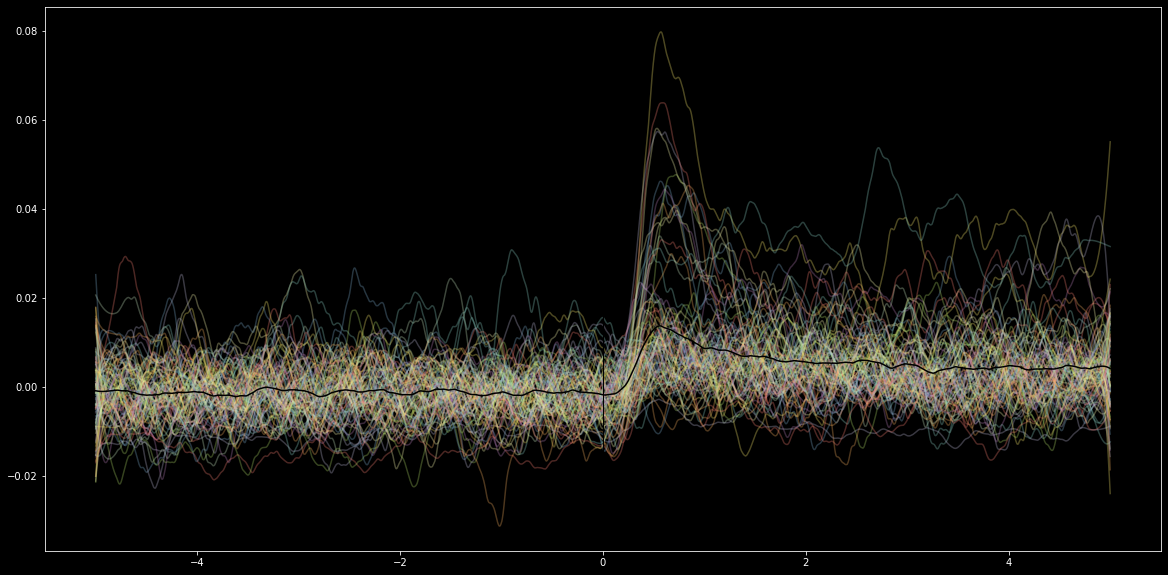

In [62]:
s.analyze('switch_dto_nd',window=(5,5)).plot('signal')

In [18]:
def f(_obj):
    _start = time.time()
    _df = _obj.details.copy()
    _df['type'] = ['SA' if (('SA' in _t) or ('BSL' in _t)) else 'ND' if ('ND' in _t) else 'unclassfied' for _t in _df.experiment_type]
    for _name in _obj.sessions.keys():
        _behavior     = _obj.sessions[_name].behavior
        _fiber        = _obj.sessions[_name].fiber
        _session      = _obj.sessions[_name]
############################# BEHAVIOR #######################################################################################
        ND1           = ', '.join([str(i) for i in _behavior.ND_1])       if 'ND_1' in _behavior.__dict__ else 'no ND1'
        ND2           = ', '.join([str(i) for i in _behavior.ND_2])       if 'ND_2' in _behavior.__dict__ else 'no ND2'
        D1            = ', '.join([str(i) for i in _behavior.D_1])
        D2            = ', '.join([str(i) for i in _behavior.D_2])        if 'D_2' in _behavior.__dict__ else 'no D2'
        _np1_ND1      = _behavior.timestamps('np1','ND_1')                if 'ND_1' in _behavior.__dict__ else np.array([])
        _np2_ND1      = _behavior.timestamps('np2','ND_1')                if 'ND_1' in _behavior.__dict__ else np.array([])
        _npT_ND1      = np.sort(np.concatenate((_np1_ND1,_np2_ND1)))      if 'ND_1' in _behavior.__dict__ else np.array([])
        _np1_ND2      = _behavior.timestamps('np1','ND_2')                if 'ND_2' in _behavior.__dict__ else np.array([])
        _np2_ND2      = _behavior.timestamps('np2','ND_2')                if 'ND_2' in _behavior.__dict__ else np.array([])
        _npT_ND2      = np.sort(np.concatenate((_np1_ND2,_np2_ND2)))      if 'ND_2' in _behavior.__dict__ else np.array([])
        _np1_D1       = _behavior.timestamps('np1','D_1')
        _np2_D1       = _behavior.timestamps('np2','D_1')
        _npT_D1       = np.sort(np.concatenate((_np1_D1,_np2_D1)))
        _np1_D2       = _behavior.timestamps('np1','D_2')                 if 'D_2' in _behavior.__dict__ else np.array([])
        _np2_D2       = _behavior.timestamps('np2','D_2')                 if 'D_2' in _behavior.__dict__ else np.array([])
        _npT_D2       = np.sort(np.concatenate((_np1_D2,_np2_D2)))        if 'D_2' in _behavior.__dict__ else np.array([])

        _inj_D1       = _behavior.timestamps('inj1','D_1')
        _inj_D2       = _behavior.timestamps('inj1','D_2')                if 'D_2' in _behavior.__dict__ else np.array([])

        np1_T         = _behavior.np1.shape[0]
        np2_T         = _behavior.np2.shape[0]
        np_T          = np1_T + np2_T
        inj_T         = _behavior.inj1.shape[0]  

        np1_ND1       = _np1_ND1.shape[0]                                 if 'ND_1' in _behavior.__dict__ else np.nan
        np1_ND2       = _np1_ND2.shape[0]                                 if 'ND_2' in _behavior.__dict__ else np.nan
        np2_ND1       = _np2_ND1.shape[0]                                 if 'ND_1' in _behavior.__dict__ else np.nan
        np2_ND2       = _np2_ND2.shape[0]
        npT_ND1       = _npT_ND1.shape[0]                                 if 'ND_1' in _behavior.__dict__ else np.nan
        npT_ND2       = _npT_ND2.shape[0]
        np1_1min_ND1  = _behavior.timestamps('np1','ND_1',60).shape[0]    if 'ND_1' in _behavior.__dict__ else np.nan
        np2_1min_ND1  = _behavior.timestamps('np2','ND_1',60).shape[0]    if 'ND_1' in _behavior.__dict__ else np.nan
        npT_1min_ND1  = np1_1min_ND1 + np2_1min_ND1
        inj_D1        = _behavior.timestamps('inj1','D_1').shape[0]
        inj_D2        = _behavior.timestamps('inj1','D_2').shape[0]        if 'D_2' in _behavior.__dict__ else np.nan
        D1_start      = _behavior.D_1[0][0]
        D2_start      = _behavior.D_2[0][0]                                if 'D_2' in _behavior.__dict__ else np.nan
        ND1_start     = _behavior.ND_1[0][0]                               if 'ND_1' in _behavior.__dict__ else np.nan
        ND2_start     = _behavior.ND_2[0][0]                               if 'ND_2' in _behavior.__dict__ else np.nan
        np1_D1_lat    = round(_np1_D1[0]  - D1_start ,3)  if len(_np1_D1) else np.nan
        np2_D1_lat    = round(_np2_D1[0]  - D1_start ,3)  if len(_np2_D1) else np.nan
        npT_D1_lat    = round(_npT_D1[0]  - D1_start ,3)  if len(_npT_D1) else np.nan
        D2_np1_lat    = round(_np1_D2[0]  - D2_start ,3)  if len(_np1_D2) else np.nan
        D2_np2_lat    = round(_np2_D2[0]  - D2_start ,3)  if len(_np2_D2) else np.nan
        D2_npT_lat    = round(_npT_D2[0]  - D2_start ,3)  if len(_npT_D2) else np.nan
        np1_ND1_lat   = round(_np1_ND1[0] - ND1_start,3)  if len(_np1_ND1) else np.nan
        np2_ND1_lat   = round(_np2_ND1[0] - ND1_start,3)  if len(_np2_ND1) else np.nan
        npT_ND1_lat   = round(_npT_ND1[0] - ND1_start,3)  if len(_npT_ND1) else np.nan
        np1_ND2_lat   = round(_np1_ND2[0] - ND2_start,3)  if len(_np1_ND2) else np.nan                     
        np2_ND2_lat   = round(_np2_ND2[0] - ND2_start,3)  if len(_np2_ND2) else np.nan                         
        npT_ND2_lat   = round(_npT_ND2[0] - ND2_start,3)  if len(_npT_ND2) else np.nan                          
        inj_D1_lat    = round(_inj_D1[0]  - D1_start ,3)  if len(_inj_D1) else np.nan
        inj_D2_lat    = round(_inj_D2[0]  - D2_start ,3)  if len(_inj_D2) else np.nan
        F6_1          = _behavior.timestamps('np1','ND_1',60*6).shape[0]    if 'ND_1' in _behavior.__dict__ else np.nan
        L9_1          = np1_ND1 - F6_1                                      if 'ND_1' in _behavior.__dict__ else np.nan
        L9F6diff_1    = L9_1 - F6_1                                         if 'ND_1' in _behavior.__dict__ else np.nan
        if np1_ND1:
            L9F6ratio_1   = round(L9F6diff_1/np1_ND1,3)
        else:
            L9F6ratio_1   = np.nan
        late_seeker_1 = 1 if (L9F6diff_1 >= 50)&(L9F6ratio_1 >= 0.5) else 0
        F6_2          = _behavior.timestamps('np1','ND_2',60*6).shape[0]     if 'ND_2' in _behavior.__dict__ else np.nan
        L9_2          = np1_ND2 - F6_2                                       if 'ND_2' in _behavior.__dict__ else np.nan
        L9F6diff_2    = L9_2 - F6_2                                          if 'ND_2' in _behavior.__dict__ else np.nan
        if np1_ND2 and ('ND_2' in _behavior.__dict__):
            L9F6ratio_2   = round(L9F6diff_2/np1_ND2,3)               
        else: 
            L9F6ratio_2   = np.nan
        late_seeker_2 = 1 if (L9F6diff_2 >= 50)&(L9F6ratio_2 >= 0.5) else 0
####################################################################################################################        
        # switch dkD1
        print(_name)
        dk_D1_time      = _behavior.LED2_ON[0][0] 
        
        _peakdk_D1pre       = _fiber.peakFA(dk_D1_time-10,dk_D1_time)
        dk_D1_peakFpre      = _peakdk_D1pre['frequency']  if _peakdk_D1pre else None  
        dk_D1_peakAdFpre    = _peakdk_D1pre['mean dF/F']   if _peakdk_D1pre else None  
        dk_D1_peakAZpre     = _peakdk_D1pre['mean zscore'] if _peakdk_D1pre else None 
        
        _peakdk_D1post      = _fiber.peakFA(dk_D1_time,dk_D1_time+10)
        dk_D1_peakFpost     = _peakdk_D1post['frequency']  if _peakdk_D1post else None    
        dk_D1_peakAdFpost   = _peakdk_D1post['mean dF/F']   if _peakdk_D1post else None
        dk_D1_peakAZpost    = _peakdk_D1post['mean zscore'] if _peakdk_D1post else None
        
        dk_D1_peakFpostpreR   = dk_D1_peakFpost  /dk_D1_peakFpre   if (dk_D1_peakFpost   != None) and dk_D1_peakFpre   else None
        dk_D1_peakAdFpostpreR = dk_D1_peakAdFpost/dk_D1_peakAdFpre if (dk_D1_peakAdFpost != None) and dk_D1_peakAdFpre else None
        dk_D1_peakAZpostpreR  = dk_D1_peakAZpost /dk_D1_peakAdFpre if (dk_D1_peakAZpost  != None) and dk_D1_peakAZpre  else None 
        
        _r1_dk_D1    = _session.analyze_perievent(dk_D1_time,window=(1,1))
        _r3_dk_D1    = _session.analyze_perievent(dk_D1_time,window=(3,3))
        _r5_dk_D1    = _session.analyze_perievent(dk_D1_time,window=(5,5))
        
        dk_D1_1preavgZ    = _r1_dk_D1.preAVG_Z   if _r1_dk_D1 else None
        dk_D1_1postavgZ   = _r1_dk_D1.postAVG_Z  if _r1_dk_D1 else None
        dk_D1_1preAUCdF   = _r1_dk_D1.preAUC     if _r1_dk_D1 else None
        dk_D1_1postAUCdF  = _r1_dk_D1.postAUC    if _r1_dk_D1 else None
        dk_D1_3preavgZ    = _r3_dk_D1.preAVG_Z   if _r3_dk_D1 else None
        dk_D1_3postavgZ   = _r3_dk_D1.postAVG_Z  if _r3_dk_D1 else None 
        dk_D1_3preAUCdF   = _r3_dk_D1.preAUC     if _r3_dk_D1 else None
        dk_D1_3postAUCdF  = _r3_dk_D1.postAUC    if _r3_dk_D1 else None
        dk_D1_5preavgZ    = _r5_dk_D1.preAVG_Z   if _r5_dk_D1 else None
        dk_D1_5postavgZ   = _r5_dk_D1.postAVG_Z  if _r5_dk_D1 else None
        dk_D1_5preAUCdF   = _r5_dk_D1.preAUC     if _r5_dk_D1 else None
        dk_D1_5postAUCdf  = _r5_dk_D1.postAUC    if _r5_dk_D1 else None
        
        #switch D1_ND1
        D1_ND1_time      = _behavior.switch_1[0]     if _behavior.switch_1 else None
        
        _peakD1_ND1pre      = _fiber.peakFA(D1_ND1_time-10,D1_ND1_time)  if _behavior.switch_1 else None
        D1_ND1_peakFpre      = _peakD1_ND1pre['frequency']  if _peakD1_ND1pre else None
        D1_ND1_peakAdFpre    = _peakD1_ND1pre['mean dF/F']   if _peakD1_ND1pre else None
        D1_ND1_peakAZpre     = _peakD1_ND1pre['mean zscore'] if _peakD1_ND1pre else None
        
        _peakD1_ND1post      = _fiber.peakFA(D1_ND1_time,D1_ND1_time+10)  if _behavior.switch_1 else None
        D1_ND1_peakFpost     = _peakD1_ND1post['frequency']  if _peakD1_ND1post else None
        D1_ND1_peakAdFpost   = _peakD1_ND1post['mean dF/F']   if _peakD1_ND1post else None
        D1_ND1_peakAZpost    = _peakD1_ND1post['mean zscore'] if _peakD1_ND1post else None
        
        D1_ND1_peakFpostpreR   = D1_ND1_peakFpost  /D1_ND1_peakFpre   if (D1_ND1_peakFpost   != None) and D1_ND1_peakFpre   else None 
        D1_ND1_peakAdFpostpreR = D1_ND1_peakAdFpost/D1_ND1_peakAdFpre if (D1_ND1_peakAdFpost != None) and D1_ND1_peakAdFpre else None
        D1_ND1_peakAZpostpreR  = D1_ND1_peakAZpost /D1_ND1_peakAdFpre if (D1_ND1_peakAZpost  != None) and D1_ND1_peakAZpre  else None 
        
        _r1_D1_ND1   = _session.analyze_perievent(D1_ND1_time,window=(1,1)) if _behavior.switch_1 else None
        _r3_D1_ND1   = _session.analyze_perievent(D1_ND1_time,window=(3,3)) if _behavior.switch_1 else None
        _r5_D1_ND1   = _session.analyze_perievent(D1_ND1_time,window=(5,5)) if _behavior.switch_1 else None
        
        D1_ND1_1preavgZ    = _r1_D1_ND1.preAVG_Z   if _r1_D1_ND1 else None
        D1_ND1_1postavgZ   = _r1_D1_ND1.postAVG_Z  if _r1_D1_ND1 else None
        D1_ND1_1preAUCdF   = _r1_D1_ND1.preAUC     if _r1_D1_ND1 else None
        D1_ND1_1postAUCdF  = _r1_D1_ND1.postAUC    if _r1_D1_ND1 else None
        D1_ND1_3preavgZ    = _r3_D1_ND1.preAVG_Z   if _r3_D1_ND1 else None
        D1_ND1_3postavgZ   = _r3_D1_ND1.postAVG_Z  if _r3_D1_ND1 else None
        D1_ND1_3preAUCdF   = _r3_D1_ND1.preAUC     if _r3_D1_ND1 else None
        D1_ND1_3postAUCdF  = _r3_D1_ND1.postAUC    if _r3_D1_ND1 else None
        D1_ND1_5preavgZ    = _r5_D1_ND1.preAVG_Z   if _r5_D1_ND1 else None
        D1_ND1_5postavgZ   = _r5_D1_ND1.postAVG_Z  if _r5_D1_ND1 else None
        D1_ND1_5preAUCdf   = _r5_D1_ND1.preAUC     if _r5_D1_ND1 else None
        D1_ND1_5postAUCdf  = _r5_D1_ND1.postAUC    if _r5_D1_ND1 else None
        
        # switch ND1_D2
        _list = [_b for _a,_b in _behavior.HLED_ON if D1_ND1_time == _a]
        ND1_D2_time       = _list[0] if _list else None
        
        _peakND1_D2pre       = _fiber.peakFA(ND1_D2_time-10,ND1_D2_time)  if _list else None 
        ND1_D2_peakFpre      = _peakND1_D2pre['frequency']  if _peakND1_D2pre else None
        ND1_D2_peakAdFpre    = _peakND1_D2pre['mean dF/F']   if _peakND1_D2pre else None
        ND1_D2_peakAZpre     = _peakND1_D2pre['mean zscore'] if _peakND1_D2pre else None
        
        _peakND1_D2post       = _fiber.peakFA(ND1_D2_time,ND1_D2_time+10)  if _list else None 
        ND1_D2_peakFpost      = _peakND1_D2post['frequency']  if _peakND1_D2post else None
        ND1_D2_peakAdFpost    = _peakND1_D2post['mean dF/F']   if _peakND1_D2post else None
        ND1_D2_peakAZpost     = _peakND1_D2post['mean zscore'] if _peakND1_D2post else None
        
        _r1_ND1_D2   = _session.analyze_perievent(ND1_D2_time,window=(1,1)) if _list else None
        _r3_ND1_D2   = _session.analyze_perievent(ND1_D2_time,window=(3,3)) if _list else None
        _r5_ND1_D2   = _session.analyze_perievent(ND1_D2_time,window=(5,5)) if _list else None
        
        ND1_D2_peakFpostpreR   = ND1_D2_peakFpost  /ND1_D2_peakFpre   if (ND1_D2_peakFpost   != None) and ND1_D2_peakFpre else None
        ND1_D2_peakAdFpostpreR = ND1_D2_peakAdFpost/ND1_D2_peakAdFpre if (ND1_D2_peakAdFpost != None) and ND1_D2_peakAdFpre else None
        ND1_D2_peakAZpostpreR  = ND1_D2_peakAZpost /ND1_D2_peakAdFpre if (ND1_D2_peakAZpost  != None) and ND1_D2_peakAZpre else None
        
        ND1_D2_1preavgZ    = _r1_ND1_D2.preAVG_Z   if _r1_ND1_D2 else None
        ND1_D2_1postavgZ   = _r1_ND1_D2.postAVG_Z  if _r1_ND1_D2 else None
        ND1_D2_1preAUCdF   = _r1_ND1_D2.preAUC     if _r1_ND1_D2 else None
        ND1_D2_1postAUCdF  = _r1_ND1_D2.postAUC    if _r1_ND1_D2 else None
        ND1_D2_3preavgZ    = _r3_ND1_D2.preAVG_Z   if _r3_ND1_D2 else None
        ND1_D2_3postavgZ   = _r3_ND1_D2.postAVG_Z  if _r3_ND1_D2 else None
        ND1_D2_3preAUCdF   = _r3_ND1_D2.preAUC     if _r3_ND1_D2 else None
        ND1_D2_3postAUCdF  = _r3_ND1_D2.postAUC    if _r3_ND1_D2 else None
        ND1_D2_5preavgZ    = _r5_ND1_D2.preAVG_Z   if _r5_ND1_D2 else None 
        ND1_D2_5postavgZ   = _r5_ND1_D2.postAVG_Z  if _r5_ND1_D2 else None 
        ND1_D2_5preAUCdf   = _r5_ND1_D2.preAUC     if _r5_ND1_D2 else None 
        ND1_D2_5postAUCdf  = _r5_ND1_D2.postAUC    if _r5_ND1_D2 else None 
####################################################################################################################
        _data = vars()
        _data = {_k:_v for _k,_v in _data.items() if _k[0] != '_'}
        for _k,_v in _data.items():
            if _k not in _df.columns:
                _df[_k] = pd.Series([np.nan])
            _idx = _df[_df.session == _name].index
            _df.loc[_idx,_k] = _v
    _df.to_csv('FIBER_BEHAVIOR_ALL.csv',sep=';')
    print(f"Extraction took {time.time() - _start} seconds")
    return _df

In [66]:
s.plot('signal')

AttributeError: 'MultiSession' object has no attribute 'plot'

In [19]:
df = f(s)

10:17:44 --- Event timestamps: [  19.769   21.628   23.262  126.489  128.723  132.876  180.192  204.999
  228.861  259.978  277.407  339.391  347.671  348.025  351.097  363.435
  365.266  374.884  386.874  389.291  391.091  391.525  557.256  582.492
  595.795  610.625  611.044  643.373  643.791  662.635  663.033  675.727
  676.165  686.635  704.647  761.45   797.528  805.499  826.071  826.321
  889.106  921.963  933.544  960.319  960.641 1132.194 1226.805 1227.063
 1317.932 1318.279 1492.918 1533.228 1703.39  1736.748 1771.122 1772.478
 1789.934 1865.428 1904.538 1905.094 1905.582 1921.134 1942.886 1943.137
 1943.609 1964.524 1964.78  2050.941 2051.493 2073.254 2091.07  2121.594
 2152.454 2152.709 2172.837 2191.465 2191.824 2209.468 2296.539 2296.998
 2354.235 2370.877 2519.814 2520.09  2598.477 2627.3   2668.207 2697.091
 2723.241 2792.3   2803.946 2842.396 2889.192 2966.516 2979.54  3014.644
 3128.92  3129.346 3172.461 3194.139 3194.665 3216.438 3217.081 3217.953
 3218.36  3219.079 3

10:17:44 --- Normalizing recording 2 with method 'raw'
10:17:44 --- Normalizing recording 2 with method 'F'
10:17:44 --- Normalizing recording 2 with method 'raw'
10:17:45 --- Normalizing recording 3 with method 'F'
10:17:45 --- Normalizing recording 3 with method 'raw'
10:17:45 --- Normalizing recording 3 with method 'F'
10:17:45 --- Normalizing recording 3 with method 'raw'
10:17:45 --- Normalizing recording 3 with method 'F'
10:17:45 --- Normalizing recording 3 with method 'raw'
10:17:45 --- Event timestamps: [  34.672   37.506   38.35    66.127  117.214  124.532  179.399  193.883
  333.163  490.275  619.479  620.196  655.111  674.441  674.957  679.956
  681.853  715.349  784.509  809.269  809.581  810.417  839.688  890.784
  891.117  897.687  898.061  905.702  926.898  954.27   954.496  954.821
  955.136  955.815  967.22   980.197  980.744  981.877  985.754  986.035
  986.36   986.699  988.072 1003.531 1003.809 1004.13  1004.466 1004.739
 1023.18  1023.532 1023.822 1024.546 1025.45

10:17:45 --- Normalizing recording 1 with method 'F'
10:17:45 --- Normalizing recording 1 with method 'raw'
10:17:45 --- Normalizing recording 1 with method 'F'
10:17:45 --- Normalizing recording 1 with method 'raw'
10:17:45 --- Normalizing recording 2 with method 'F'
10:17:46 --- Normalizing recording 2 with method 'raw'
10:17:46 --- Normalizing recording 2 with method 'F'
10:17:46 --- Normalizing recording 2 with method 'raw'
10:17:46 --- Normalizing recording 2 with method 'F'
10:17:46 --- Normalizing recording 2 with method 'raw'
10:17:46 --- Normalizing recording 3 with method 'F'
10:17:46 --- Normalizing recording 3 with method 'raw'
10:17:46 --- Normalizing recording 3 with method 'F'
10:17:46 --- Normalizing recording 3 with method 'raw'
10:17:46 --- Normalizing recording 3 with method 'F'
10:17:46 --- Normalizing recording 3 with method 'raw'
10:17:46 --- Event timestamps: [ 351.402  805.897  840.751  944.575 1055.87  1080.389 1080.996 1081.545
 1117.062 1117.785 1144.044 1147

10:17:47 --- Normalizing recording 1 with method 'F'
10:17:47 --- Normalizing recording 1 with method 'raw'
10:17:47 --- Normalizing recording 1 with method 'F'
10:17:47 --- Normalizing recording 1 with method 'raw'
10:17:47 --- Normalizing recording 2 with method 'F'
10:17:47 --- Normalizing recording 2 with method 'raw'
10:17:47 --- Normalizing recording 2 with method 'F'
10:17:47 --- Normalizing recording 2 with method 'raw'
10:17:47 --- Normalizing recording 2 with method 'F'
10:17:47 --- Normalizing recording 2 with method 'raw'
10:17:47 --- Normalizing recording 3 with method 'F'
10:17:47 --- Normalizing recording 3 with method 'raw'
10:17:47 --- Normalizing recording 3 with method 'F'
10:17:47 --- Normalizing recording 3 with method 'raw'
10:17:47 --- Normalizing recording 3 with method 'F'
10:17:47 --- Normalizing recording 3 with method 'raw'
10:17:48 --- Event timestamps: [  43.359   43.594  117.758  174.086  174.477  364.667  398.284  402.158
  435.142  542.643  825.692  829

10:17:48 --- No fiber recording at timestamp: 3300.027 for ../../DATA/FIBER/AK20R_rat_3_SA_j18/rat 3 AK20R SESSION 20 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_3_SA_j18/bsa20112020c19_01.dat
10:17:48 --- No fiber recording at timestamp: 3300.027 for ../../DATA/FIBER/AK20R_rat_3_SA_j18/rat 3 AK20R SESSION 20 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_3_SA_j18/bsa20112020c19_01.dat
10:17:48 --- No fiber recording at timestamp: 3300.027 for ../../DATA/FIBER/AK20R_rat_3_SA_j18/rat 3 AK20R SESSION 20 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_3_SA_j18/bsa20112020c19_01.dat
10:17:48 --- Event timestamps: [ 302.942  303.596  361.391  568.849  601.537  602.81   705.036  706.746
  709.191  712.113  712.636  768.521  772.028  773.598  774.015  774.426
  838.117  842.225  845.409  857.501  858.804  911.627  913.264  916.751
  917.118  924.64  1161.102 1161.52  1161.904 1164.846 1166.184 1652.206
 1653.26  1653.986 1655.377 1656.447 1763.156 1763.595 1763.945 1764.234
 1764.882 2234.343 2235.912 2238.0

10:17:49 --- No fiber recording at timestamp: 0.053 for ../../DATA/FIBER/AK20R_rat_4_SA_j17/rat 4 AK20R SESSION 19 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_4_SA_j17/bsa19112020c20_01.dat
10:17:49 --- No fiber recording at timestamp: 0.053 for ../../DATA/FIBER/AK20R_rat_4_SA_j17/rat 4 AK20R SESSION 19 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_4_SA_j17/bsa19112020c20_01.dat
10:17:49 --- No fiber recording at timestamp: 0.053 for ../../DATA/FIBER/AK20R_rat_4_SA_j17/rat 4 AK20R SESSION 19 11 2020_0.csv,../../DATA/FIBER/AK20R_rat_4_SA_j17/bsa19112020c20_01.dat
10:17:49 --- Normalizing recording 3 with method 'F'
10:17:49 --- Normalizing recording 3 with method 'raw'
10:17:49 --- Normalizing recording 3 with method 'F'
10:17:49 --- Normalizing recording 3 with method 'raw'
10:17:49 --- Normalizing recording 3 with method 'F'
10:17:49 --- Normalizing recording 3 with method 'raw'
10:17:49 --- No fiber recording at timestamp: 3300.007 for ../../DATA/FIBER/AK20R_rat_4_SA_j17/rat 4 AK20R SESSION 

10:17:49 --- Normalizing recording 1 with method 'raw'
10:17:50 --- Normalizing recording 1 with method 'F'
10:17:50 --- Normalizing recording 1 with method 'raw'
10:17:50 --- Normalizing recording 1 with method 'F'
10:17:50 --- Normalizing recording 1 with method 'raw'
10:17:51 --- No fiber recording at timestamp: 3300.005 for ../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/AL21Rrat12nciBSL230112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/bsa30112021c20_01.dat
10:17:51 --- No fiber recording at timestamp: 3300.005 for ../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/AL21Rrat12nciBSL230112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/bsa30112021c20_01.dat
10:17:51 --- No fiber recording at timestamp: 3300.005 for ../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/AL21Rrat12nciBSL230112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NCIBSL_j36/bsa30112021c20_01.dat
10:17:51 --- Event timestamps: [  53.628   97.625   98.496   99.632  100.434  102.821  104.257  109.691
  110.447  111.279  111.761  128.214  13

 4205.85  4206.839 4207.99  4208.494 4210.386]
[[(20.002, 900.0)]]
[(20.002, 900.0)]
10:17:51 --- Intervals restricted to 360 seconds.
10:17:51 --- Event timestamps: [  53.628   97.625   98.496   99.632  100.434  102.821  104.257  109.691
  110.447  111.279  111.761  128.214  139.875  167.34   204.369  204.966
  224.552  225.526  341.772  342.299  351.603  356.169  360.047  360.666
  414.941  416.988  417.771  425.623  451.347  525.234  525.534  527.06
  531.222  534.932  557.242  562.491  563.499  565.994  599.959  602.921
  604.677  655.887  717.779  722.946  723.961  725.578  726.469  728.353
  733.736  735.207  741.702  742.42   743.857  749.24   754.845  755.301
  755.804  757.954  758.716  764.704  802.694  807.614  808.155  810.148
  813.073  814.114  816.234  817.42   824.368  834.174  841.473  868.695
  869.108  871.356  919.777  921.061  921.533  922.699  924.333  925.657
  929.721  930.967  933.638  934.36   960.743  965.009  966.273  967.505
  971.161  972.099  973.629  974

10:17:52 --- Event timestamps: [ 191.687  259.799  270.653  272.769  348.658  450.683  451.993  454.
  455.416  459.483  460.858  462.194  464.467  465.719  581.072  591.289
  591.633  612.8    665.406  738.598  801.216  898.092  899.046  956.578
 1006.659 1019.486 1022.861 1025.001 1025.995 1029.287 1042.443 1049.926
 1050.301 1050.907 1073.269 1103.082 1127.    1147.34  1155.596 1156.328
 1157.304 3511.667 3512.157 3523.077 3525.601 3527.231 3531.702 3532.355
 3713.438 3714.133 3721.134 3814.666 3999.651 4000.729 4181.132]
[[(0, 10.005)]]
[(0, 10.005)]
10:17:52 --- Event timestamps: [  45.545  121.683  159.265  160.064  162.401  162.952  163.311  177.786
  178.16   178.475  179.276  180.418  184.994  185.388  220.188  241.693
  242.101  243.012  244.635  248.925  320.822  321.141  322.047  326.491
  327.054  358.382  359.078  362.084  362.436  363.467  365.162  366.958
  377.19   378.471  378.919  379.44   410.222  410.919  411.332  428.983
  487.891  511.161  512.942  515.19   516.4

10:17:52 --- Normalizing recording 2 with method 'F'
10:17:52 --- Normalizing recording 2 with method 'raw'
10:17:52 --- Normalizing recording 3 with method 'F'
10:17:52 --- Normalizing recording 3 with method 'raw'
10:17:53 --- Normalizing recording 3 with method 'F'
10:17:53 --- Normalizing recording 3 with method 'raw'
10:17:53 --- Normalizing recording 3 with method 'F'
10:17:53 --- Normalizing recording 3 with method 'raw'
10:17:53 --- No fiber recording at timestamp: 4200.162 for ../../DATA/FIBER/AL21R_rat_12_NDPre_j28/AL21Rrat12NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NDPre_j28/bsa18112021c20_01.dat
10:17:53 --- No fiber recording at timestamp: 4200.162 for ../../DATA/FIBER/AL21R_rat_12_NDPre_j28/AL21Rrat12NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NDPre_j28/bsa18112021c20_01.dat
10:17:53 --- No fiber recording at timestamp: 4200.162 for ../../DATA/FIBER/AL21R_rat_12_NDPre_j28/AL21Rrat12NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_12_NDPre_j28/bsa18112021c20

10:17:53 --- Event timestamps: [ 61.851  62.604 141.633 171.258 389.819 529.056]
[[(3300.0, 5700.0)]]
[(3300.0, 5700.0)]
10:17:53 --- Event timestamps: [  78.845  149.445  255.874  354.764  436.671  501.117  703.616  775.986
 1038.101 1358.252 1558.981 1741.064 1970.677 2251.918 2345.528 3321.582
 3416.24  3812.21  4100.587 4349.052 4617.662 4835.078 5038.772 5435.078
 5534.54  6608.101 6675.483 6889.166 6960.922 7224.574 7400.546 7623.634
 7986.535 8250.316 8402.477]
[[(0, 2400.0)]]
[(0, 2400.0)]
10:17:53 --- Event timestamps: [  78.845  149.445  255.874  354.764  436.671  501.117  703.616  775.986
 1038.101 1358.252 1558.981 1741.064 1970.677 2251.918 2345.528 3321.582
 3416.24  3812.21  4100.587 4349.052 4617.662 4835.078 5038.772 5435.078
 5534.54  6608.101 6675.483 6889.166 6960.922 7224.574 7400.546 7623.634
 7986.535 8250.316 8402.477]
[[(3300.0, 5700.0)]]
[(3300.0, 5700.0)]
10:17:53 --- Event timestamps: [  35.972   67.923   69.773   76.47    77.494  129.903  133.382  134.085
 

10:17:53 --- Normalizing recording 1 with method 'F'
10:17:53 --- Normalizing recording 1 with method 'raw'
10:17:53 --- Normalizing recording 1 with method 'F'
10:17:53 --- Normalizing recording 1 with method 'raw'
10:17:53 --- Normalizing recording 2 with method 'F'
10:17:53 --- Normalizing recording 2 with method 'raw'
10:17:54 --- Normalizing recording 2 with method 'F'
10:17:54 --- Normalizing recording 2 with method 'raw'
10:17:54 --- Normalizing recording 2 with method 'F'
10:17:54 --- Normalizing recording 2 with method 'raw'
10:17:54 --- Normalizing recording 3 with method 'F'
10:17:54 --- Normalizing recording 3 with method 'raw'
10:17:54 --- Normalizing recording 3 with method 'F'
10:17:54 --- Normalizing recording 3 with method 'raw'
10:17:54 --- Normalizing recording 3 with method 'F'
10:17:54 --- Normalizing recording 3 with method 'raw'
10:17:54 --- Event timestamps: [7.000000e+00 1.050020e+02 1.621200e+02 1.630140e+02 2.037200e+02
 2.537550e+02 2.701660e+02 2.813050e+02

10:17:55 --- Normalizing recording 1 with method 'raw'
10:17:55 --- Normalizing recording 1 with method 'F'
10:17:55 --- Normalizing recording 1 with method 'raw'
10:17:55 --- Normalizing recording 1 with method 'F'
10:17:56 --- Normalizing recording 1 with method 'raw'
10:17:56 --- Normalizing recording 1 with method 'F'
10:17:56 --- Normalizing recording 1 with method 'raw'


C:\Users\mceau\Documents\fiberphotopy\fiberphotopy\analysis.py:112: RuntimeWarning: divide by zero encountered in true_divide
  res.zscores       = (res.signal - res.preevent.mean()) / res.preevent.std()
C:\Users\mceau\Documents\fiberphotopy\fiberphotopy\analysis.py:112: RuntimeWarning: invalid value encountered in true_divide
  res.zscores       = (res.signal - res.preevent.mean()) / res.preevent.std()
C:\Users\mceau\Documents\fiberphotopy\fiberphotopy\analysis.py:115: RuntimeWarning: divide by zero encountered in true_divide
  res.rob_zscores   = (res.signal - np.median(res.preevent))/stats.median_abs_deviation(res.preevent)
C:\Users\mceau\Documents\fiberphotopy\fiberphotopy\analysis.py:115: RuntimeWarning: invalid value encountered in true_divide
  res.rob_zscores   = (res.signal - np.median(res.preevent))/stats.median_abs_deviation(res.preevent)
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum

10:17:56 --- Normalizing recording 1 with method 'F'
10:17:57 --- Normalizing recording 1 with method 'raw'
10:17:57 --- Normalizing recording 1 with method 'F'
10:17:57 --- Normalizing recording 1 with method 'raw'
10:17:57 --- Event timestamps: [  49.209   58.262  101.39   193.549  194.126  194.861  212.7    298.213
  299.472  301.588  302.238  431.704  438.455  438.718  488.194  490.878
  496.317  497.368  498.418  499.524  504.226  686.117  727.044  727.654
  728.855  760.059  767.134  791.19   795.15   795.423  796.301  840.577
  841.389  846.443  851.148  852.319  853.48   914.732  918.465  924.317
  970.859  979.146  979.693  985.678 1020.308 1029.072 1031.743 1032.588
 1040.249 1043.607 1088.521 1093.697 1101.047 1108.586 1109.078 1109.49
 1321.207 1341.561 1342.256 1342.834 1343.436 1344.085 1536.813 1537.448
 1538.178 1538.752 1539.452 1540.213 1867.658 1868.491 1869.001 1869.97
 1870.625 2056.951 2057.659 2058.402 2059.111 2059.939 2257.074 2257.642
 2258.112 2258.939 2272.1

10:17:58 --- Normalizing recording 1 with method 'raw'
10:17:58 --- Normalizing recording 1 with method 'F'
10:17:58 --- Normalizing recording 1 with method 'raw'
10:17:58 --- Normalizing recording 3 with method 'F'
10:17:58 --- Normalizing recording 3 with method 'raw'
10:17:58 --- Normalizing recording 3 with method 'F'
10:17:58 --- Normalizing recording 3 with method 'raw'
10:17:58 --- Normalizing recording 3 with method 'F'
10:17:58 --- Normalizing recording 3 with method 'raw'
10:17:58 --- Normalizing recording 4 with method 'F'
10:17:58 --- Normalizing recording 4 with method 'raw'
10:17:58 --- Normalizing recording 4 with method 'F'
10:17:58 --- Normalizing recording 4 with method 'raw'
10:17:58 --- Normalizing recording 4 with method 'F'
10:17:58 --- Normalizing recording 4 with method 'raw'
10:17:58 --- Event timestamps: [  31.252   31.627   33.259  139.712  140.164  141.503  141.887  142.882
  145.694  146.834  201.954  279.686  302.204  303.042  303.352  315.748
  316.77   3

10:17:59 --- Normalizing recording 2 with method 'F'
10:17:59 --- Normalizing recording 2 with method 'raw'
10:17:59 --- Normalizing recording 2 with method 'F'
10:17:59 --- Normalizing recording 2 with method 'raw'
10:17:59 --- Normalizing recording 2 with method 'F'
10:17:59 --- Normalizing recording 2 with method 'raw'
10:17:59 --- Normalizing recording 3 with method 'F'
10:17:59 --- Normalizing recording 3 with method 'raw'
10:17:59 --- Normalizing recording 3 with method 'F'
10:17:59 --- Normalizing recording 3 with method 'raw'
10:17:59 --- Normalizing recording 3 with method 'F'
10:17:59 --- Normalizing recording 3 with method 'raw'
10:17:59 --- No fiber recording at timestamp: 4200.06 for ../../DATA/FIBER/AL21R_rat_2_NDPre_j29/AL21Rrat2NDPRE119112021_0.csv,../../DATA/FIBER/AL21R_rat_2_NDPre_j29/bsa19112021c20_01.dat
10:17:59 --- No fiber recording at timestamp: 4200.06 for ../../DATA/FIBER/AL21R_rat_2_NDPre_j29/AL21Rrat2NDPRE119112021_0.csv,../../DATA/FIBER/AL21R_rat_2_NDPre_j2

10:17:59 --- No fiber recording at timestamp: 0.0 for ../../DATA/FIBER/AL21R_rat_3_NCIBSL_j37/AL21Rrat3nciBSL101122021_0.csv,../../DATA/FIBER/AL21R_rat_3_NCIBSL_j37/bsa01122021c20_02.dat
10:17:59 --- No fiber recording at timestamp: 0.0 for ../../DATA/FIBER/AL21R_rat_3_NCIBSL_j37/AL21Rrat3nciBSL101122021_0.csv,../../DATA/FIBER/AL21R_rat_3_NCIBSL_j37/bsa01122021c20_02.dat
10:18:00 --- Normalizing recording 1 with method 'F'
10:18:00 --- Normalizing recording 1 with method 'raw'
10:18:00 --- Normalizing recording 1 with method 'F'
10:18:00 --- Normalizing recording 1 with method 'raw'
10:18:00 --- Normalizing recording 1 with method 'F'
10:18:01 --- Normalizing recording 1 with method 'raw'
10:18:01 --- Normalizing recording 1 with method 'F'
10:18:01 --- Normalizing recording 1 with method 'raw'
10:18:02 --- Normalizing recording 1 with method 'F'
10:18:02 --- Normalizing recording 1 with method 'raw'


C:\Users\mceau\Anaconda3\lib\site-packages\scipy\integrate\_quadrature.py:545: RuntimeWarning: invalid value encountered in double_scalars
  val += 0.5*first_dx*(y[slice2]+y[slice1])


10:18:02 --- Normalizing recording 1 with method 'F'
10:18:02 --- Normalizing recording 1 with method 'raw'
10:18:03 --- Event timestamps: [  75.4    142.5    222.966  337.551  359.887  361.386  362.964  539.032
  548.389  548.766  593.066  692.406  737.143  739.761  740.385  741.359
  803.283  855.895  867.791  869.3    909.954  910.296  915.545  951.912
  971.805  973.828  994.101 1016.64  1017.313 1019.734 1021.077 1023.67
 1025.683 1061.565 1063.449 1070.401 1071.808 1076.64  1078.382 1079.507
 1083.654 1113.195 1124.309 1125.278 1127.217 1128.668 1129.839 1132.229
 1133.76  1148.084 1153.341 1155.067 1166.744 1172.845 1173.945 1174.523
 1174.922 1176.632 1177.947 1178.508 1180.374 1180.881 1188.703 1198.784
 1199.135 1225.913 1226.761 1227.613 1244.156 1244.773 1370.102 1413.35
 1531.83  2048.404 2053.731 2422.794 2423.178 2423.537 2423.941 2438.149
 2750.278 2750.606 2764.306 2764.673 2765.017 3072.054 3077.99  3078.376
 3078.873 3108.546 3109.072 3397.587 3944.919 3969.781 3970.

10:18:03 --- Normalizing recording 1 with method 'F'
10:18:03 --- Normalizing recording 1 with method 'raw'
10:18:03 --- Normalizing recording 1 with method 'F'
10:18:03 --- Normalizing recording 1 with method 'raw'
10:18:03 --- Normalizing recording 3 with method 'F'
10:18:03 --- Normalizing recording 3 with method 'raw'
10:18:03 --- Normalizing recording 3 with method 'F'
10:18:03 --- Normalizing recording 3 with method 'raw'
10:18:03 --- Normalizing recording 3 with method 'F'
10:18:03 --- Normalizing recording 3 with method 'raw'
10:18:03 --- Normalizing recording 4 with method 'F'
10:18:03 --- Normalizing recording 4 with method 'raw'
10:18:03 --- Normalizing recording 4 with method 'F'
10:18:03 --- Normalizing recording 4 with method 'raw'
10:18:03 --- Normalizing recording 4 with method 'F'
10:18:03 --- Normalizing recording 4 with method 'raw'
10:18:04 --- Event timestamps: [  82.136  131.727  192.194  245.948  246.443  268.451  344.021  424.167
  877.729  912.299  933.84   953

10:18:04 --- Normalizing recording 2 with method 'raw'
10:18:04 --- Normalizing recording 2 with method 'F'
10:18:04 --- Normalizing recording 2 with method 'raw'
10:18:04 --- Normalizing recording 2 with method 'F'
10:18:04 --- Normalizing recording 2 with method 'raw'
10:18:04 --- Normalizing recording 3 with method 'F'
10:18:04 --- Normalizing recording 3 with method 'raw'
10:18:04 --- Normalizing recording 3 with method 'F'
10:18:04 --- Normalizing recording 3 with method 'raw'
10:18:04 --- Normalizing recording 3 with method 'F'
10:18:04 --- Normalizing recording 3 with method 'raw'
10:18:04 --- No fiber recording at timestamp: 4200.021 for ../../DATA/FIBER/AL21R_rat_3_NDPre_j28/AL21Rrat3NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_3_NDPre_j28/bsa18112021c20_02.dat
10:18:04 --- No fiber recording at timestamp: 4200.021 for ../../DATA/FIBER/AL21R_rat_3_NDPre_j28/AL21Rrat3NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_3_NDPre_j28/bsa18112021c20_02.dat
10:18:04 --- No fiber recor

10:18:05 --- Normalizing recording 1 with method 'F'
10:18:05 --- Normalizing recording 1 with method 'raw'
10:18:05 --- Normalizing recording 1 with method 'F'
10:18:05 --- Normalizing recording 1 with method 'raw'
10:18:05 --- Normalizing recording 2 with method 'F'
10:18:05 --- Normalizing recording 2 with method 'raw'
10:18:05 --- Normalizing recording 2 with method 'F'
10:18:05 --- Normalizing recording 2 with method 'raw'
10:18:05 --- Normalizing recording 2 with method 'F'
10:18:05 --- Normalizing recording 2 with method 'raw'
10:18:05 --- Normalizing recording 3 with method 'F'
10:18:05 --- Normalizing recording 3 with method 'raw'
10:18:06 --- Normalizing recording 3 with method 'F'
10:18:06 --- Normalizing recording 3 with method 'raw'
10:18:06 --- Normalizing recording 3 with method 'F'
10:18:06 --- Normalizing recording 3 with method 'raw'
10:18:06 --- Event timestamps: [   7.405   17.144   92.634  122.471  123.502  125.306  196.698  220.932
  222.323  308.014  308.583  309

10:18:06 --- Normalizing recording 1 with method 'F'
10:18:06 --- Normalizing recording 1 with method 'raw'
10:18:06 --- Normalizing recording 1 with method 'F'
10:18:06 --- Normalizing recording 1 with method 'raw'
10:18:06 --- Normalizing recording 3 with method 'F'
10:18:06 --- Normalizing recording 3 with method 'raw'
10:18:06 --- Normalizing recording 3 with method 'F'
10:18:06 --- Normalizing recording 3 with method 'raw'
10:18:07 --- Normalizing recording 3 with method 'F'
10:18:07 --- Normalizing recording 3 with method 'raw'
10:18:07 --- Normalizing recording 4 with method 'F'
10:18:07 --- Normalizing recording 4 with method 'raw'
10:18:07 --- Normalizing recording 4 with method 'F'
10:18:07 --- Normalizing recording 4 with method 'raw'
10:18:07 --- Normalizing recording 4 with method 'F'
10:18:07 --- Normalizing recording 4 with method 'raw'
10:18:07 --- Event timestamps: [  15.496   19.868   20.524   43.02    43.941   71.414   72.28   146.724
  147.324  147.792  148.653  149

 3983.478 3984.022 3984.928 4196.566 4197.288 4197.949 4199.198]
[[(900.0, 3300.004)]]
[(900.0, 3300.004)]
10:18:07 --- Event timestamps: [ 961.693 1035.942 1131.575 1319.758 1424.429 1510.088 1732.374 1811.76
 2296.333 2571.143 2820.249 2981.953 3203.745]
[[(0, 10.0)]]
[(0, 10.0)]
10:18:07 --- Event timestamps: [ 961.693 1035.942 1131.575 1319.758 1424.429 1510.088 1732.374 1811.76
 2296.333 2571.143 2820.249 2981.953 3203.745]
[[(900.0, 3300.004)]]
[(900.0, 3300.004)]
10:18:07 --- Event timestamps: [  15.496   19.868   20.524   43.02    43.941   71.414   72.28   146.724
  147.324  147.792  148.653  149.878  182.408  237.537  294.952  296.61
  297.404  298.326  339.973  434.013  434.9    435.711  487.66   488.281
  488.883  533.438  581.736  587.805  590.538  591.251  593.015  594.78
  595.296  625.009  626.093  626.726  661.686  663.436  665.72   666.426
  719.672  751.214  845.744  849.696  851.532  853.126  907.965  917.426
  920.152  928.9    960.342 1000.489 1013.728 1017.368 102

10:18:07 --- Normalizing recording 2 with method 'F'
10:18:07 --- Normalizing recording 2 with method 'raw'
10:18:07 --- Normalizing recording 2 with method 'F'
10:18:07 --- Normalizing recording 2 with method 'raw'
10:18:07 --- Normalizing recording 3 with method 'F'
10:18:07 --- Normalizing recording 3 with method 'raw'
10:18:08 --- Normalizing recording 3 with method 'F'
10:18:08 --- Normalizing recording 3 with method 'raw'
10:18:08 --- Normalizing recording 3 with method 'F'
10:18:08 --- Normalizing recording 3 with method 'raw'
10:18:08 --- No fiber recording at timestamp: 4200.029 for ../../DATA/FIBER/AL21R_rat_6_NDPre_j28/AL21Rrat6NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_6_NDPre_j28/bsa18112021c20_03.dat
10:18:08 --- No fiber recording at timestamp: 4200.029 for ../../DATA/FIBER/AL21R_rat_6_NDPre_j28/AL21Rrat6NDPRE118112021_0.csv,../../DATA/FIBER/AL21R_rat_6_NDPre_j28/bsa18112021c20_03.dat
10:18:08 --- No fiber recording at timestamp: 4200.029 for ../../DATA/FIBER/AL21R_

10:18:08 --- Normalizing recording 1 with method 'F'
10:18:08 --- Normalizing recording 1 with method 'raw'
10:18:08 --- Normalizing recording 1 with method 'F'
10:18:08 --- Normalizing recording 1 with method 'raw'
10:18:08 --- Normalizing recording 1 with method 'F'
10:18:08 --- Normalizing recording 1 with method 'raw'
10:18:09 --- Normalizing recording 2 with method 'F'
10:18:09 --- Normalizing recording 2 with method 'raw'
10:18:09 --- Normalizing recording 2 with method 'F'
10:18:09 --- Normalizing recording 2 with method 'raw'
10:18:09 --- Normalizing recording 2 with method 'F'
10:18:09 --- Normalizing recording 2 with method 'raw'
10:18:09 --- Normalizing recording 3 with method 'F'
10:18:09 --- Normalizing recording 3 with method 'raw'
10:18:09 --- Normalizing recording 3 with method 'F'
10:18:09 --- Normalizing recording 3 with method 'raw'
10:18:09 --- Normalizing recording 3 with method 'F'
10:18:09 --- Normalizing recording 3 with method 'raw'
10:18:09 --- Event timestamp

10:18:10 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/AL21Rrat8nciBSL03122021_0.csv,../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/bsa03122021c20_01.dat
10:18:10 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/AL21Rrat8nciBSL03122021_0.csv,../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/bsa03122021c20_01.dat
10:18:10 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/AL21Rrat8nciBSL03122021_0.csv,../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/bsa03122021c20_01.dat
10:18:10 --- Normalizing recording 1 with method 'F'
10:18:10 --- Normalizing recording 1 with method 'raw'
10:18:10 --- Normalizing recording 1 with method 'F'
10:18:11 --- Normalizing recording 1 with method 'raw'
10:18:11 --- Normalizing recording 1 with method 'F'
10:18:12 --- Normalizing recording 1 with method 'raw'
10:18:12 --- No fiber recording at timestamp: 3300.004 for ../../DATA/FIBER/AL21R_rat_8_NCIBSL_j39/AL21Rrat8nciB

10:18:12 --- Normalizing recording 1 with method 'F'
10:18:12 --- Normalizing recording 1 with method 'raw'
10:18:12 --- Normalizing recording 1 with method 'F'
10:18:13 --- Normalizing recording 1 with method 'raw'
10:18:13 --- Normalizing recording 1 with method 'F'
10:18:13 --- Normalizing recording 1 with method 'raw'
10:18:13 --- Normalizing recording 3 with method 'F'
10:18:13 --- Normalizing recording 3 with method 'raw'
10:18:13 --- Normalizing recording 3 with method 'F'
10:18:13 --- Normalizing recording 3 with method 'raw'
10:18:13 --- Normalizing recording 3 with method 'F'
10:18:13 --- Normalizing recording 3 with method 'raw'
10:18:13 --- Normalizing recording 4 with method 'F'
10:18:13 --- Normalizing recording 4 with method 'raw'
10:18:13 --- Normalizing recording 4 with method 'F'
10:18:13 --- Normalizing recording 4 with method 'raw'
10:18:13 --- Normalizing recording 4 with method 'F'
10:18:13 --- Normalizing recording 4 with method 'raw'
10:18:13 --- Event timestamp

 4.159874e+03 4.193169e+03 4.194906e+03 4.199941e+03]
[[(10.0, 900.0)]]
[(10.0, 900.0)]
10:18:13 --- Intervals restricted to 360 seconds.
10:18:13 --- Event timestamps: [1.748000e+00 2.084000e+00 2.521000e+00 3.216000e+00 4.769200e+01
 1.130500e+02 1.134400e+02 1.141590e+02 1.725310e+02 1.732110e+02
 1.736630e+02 1.751290e+02 2.209540e+02 2.216100e+02 2.498570e+02
 2.501430e+02 2.814550e+02 2.831740e+02 3.630380e+02 3.637880e+02
 3.650840e+02 5.927180e+02 6.652170e+02 7.518160e+02 7.541880e+02
 7.815570e+02 7.850010e+02 8.947730e+02 9.182920e+02 9.646200e+02
 1.061268e+03 1.062237e+03 1.063172e+03 1.063662e+03 1.103098e+03
 1.103520e+03 1.117369e+03 1.129305e+03 1.153337e+03 1.153938e+03
 1.155150e+03 1.163935e+03 1.209342e+03 1.209854e+03 1.210464e+03
 1.210926e+03 1.211738e+03 1.212053e+03 1.266702e+03 1.267085e+03
 1.267341e+03 1.268468e+03 1.269278e+03 1.269622e+03 1.297115e+03
 1.361616e+03 1.361928e+03 1.362678e+03 1.363276e+03 1.363662e+03
 1.386868e+03 1.400935e+03 1.401156e+03

10:18:15 --- Normalizing recording 2 with method 'F'
10:18:15 --- Normalizing recording 2 with method 'raw'
10:18:15 --- Normalizing recording 2 with method 'F'
10:18:15 --- Normalizing recording 2 with method 'raw'
10:18:15 --- Normalizing recording 2 with method 'F'
10:18:15 --- Normalizing recording 2 with method 'raw'
10:18:15 --- Normalizing recording 3 with method 'F'
10:18:15 --- Normalizing recording 3 with method 'raw'
10:18:15 --- Normalizing recording 3 with method 'F'
10:18:15 --- Normalizing recording 3 with method 'raw'
10:18:15 --- Normalizing recording 3 with method 'F'
10:18:15 --- Normalizing recording 3 with method 'raw'
10:18:15 --- No fiber recording at timestamp: 4200.021 for ../../DATA/FIBER/AL21R_rat_9_NDPre_j29/AL21Rrat9NDPRE119112021_0.csv,../../DATA/FIBER/AL21R_rat_9_NDPre_j29/bsa19112021c20_03.dat
10:18:15 --- No fiber recording at timestamp: 4200.021 for ../../DATA/FIBER/AL21R_rat_9_NDPre_j29/AL21Rrat9NDPRE119112021_0.csv,../../DATA/FIBER/AL21R_rat_9_NDPre_

10:18:16 --- Normalizing recording 1 with method 'raw'
10:18:16 --- Normalizing recording 1 with method 'F'
10:18:16 --- Normalizing recording 1 with method 'raw'
10:18:16 --- Normalizing recording 1 with method 'F'
10:18:16 --- Normalizing recording 1 with method 'raw'
10:18:16 --- Normalizing recording 2 with method 'F'
10:18:16 --- Normalizing recording 2 with method 'raw'
10:18:16 --- Normalizing recording 2 with method 'F'
10:18:16 --- Normalizing recording 2 with method 'raw'
10:18:16 --- Normalizing recording 2 with method 'F'
10:18:16 --- Normalizing recording 2 with method 'raw'
10:18:16 --- Normalizing recording 3 with method 'F'
10:18:16 --- Normalizing recording 3 with method 'raw'
10:18:17 --- Normalizing recording 3 with method 'F'
10:18:17 --- Normalizing recording 3 with method 'raw'
10:18:17 --- Normalizing recording 3 with method 'F'
10:18:17 --- Normalizing recording 3 with method 'raw'
10:18:17 --- Event timestamps: [  43.344   43.851   63.414   87.051  115.293  128

 8962.047 8962.635]
[[(2400.001, 3300.003)]]
[(2400.001, 3300.003)]
10:18:17 --- Intervals restricted to 360 seconds.
10:18:17 --- Event timestamps: [  43.344   43.851   63.414   87.051  115.293  128.303  138.542  164.103
  166.046  176.965  177.348  177.752  287.736  293.895  305.457  306.156
  308.956  369.879  370.504  370.893  372.167  373.978  522.603  560.223
  561.345  561.6    562.57   563.731  564.14   565.327  780.414  781.383
  782.968  783.338  784.084  785.314  977.485  977.888  978.637  978.956
  979.34  1341.107 1343.114 1343.616 1344.876 1345.309 1345.806 1652.082
 1652.477 1655.329 1655.728 1656.5   1656.776 1916.526 1919.483 1920.28
 1920.954 1922.1   1922.499 2164.875 2165.195 2165.544 2166.125 2168.319
 2347.082 2347.673 2348.165 2348.53  2349.572 2569.886 2583.998 2600.003
 2668.424 2670.037 2683.539 2696.381 2706.487 2753.536 2754.215 2754.739
 2755.138 2756.319 2777.781 2778.253 2780.064 2802.933 2805.876 2824.897
 2826.349 2826.89  2854.773 2872.04  2887.173 291

10:18:18 --- Normalizing recording 1 with method 'F'
10:18:18 --- Normalizing recording 1 with method 'raw'
10:18:18 --- Normalizing recording 1 with method 'F'
10:18:18 --- Normalizing recording 1 with method 'raw'
10:18:19 --- Normalizing recording 2 with method 'F'
10:18:19 --- Normalizing recording 2 with method 'raw'
10:18:19 --- Normalizing recording 2 with method 'F'
10:18:19 --- Normalizing recording 2 with method 'raw'
10:18:19 --- Normalizing recording 2 with method 'F'
10:18:19 --- Normalizing recording 2 with method 'raw'
10:18:19 --- Normalizing recording 3 with method 'F'
10:18:19 --- Normalizing recording 3 with method 'raw'
10:18:19 --- Normalizing recording 3 with method 'F'
10:18:19 --- Normalizing recording 3 with method 'raw'
10:18:19 --- Normalizing recording 3 with method 'F'
10:18:19 --- Normalizing recording 3 with method 'raw'
10:18:19 --- Event timestamps: [  18.015   30.62    31.893 ... 3298.697 3299.017 3299.494]
[[(2400.001, 3300.0)]]
[(2400.001, 3300.0)]
1

10:18:24 --- Normalizing recording 1 with method 'F'
10:18:24 --- Normalizing recording 1 with method 'raw'
10:18:25 --- Normalizing recording 1 with method 'F'
10:18:25 --- Normalizing recording 1 with method 'raw'
10:18:25 --- Normalizing recording 1 with method 'F'
10:18:25 --- Normalizing recording 1 with method 'raw'
10:18:25 --- Normalizing recording 1 with method 'F'
10:18:26 --- Normalizing recording 1 with method 'raw'
10:18:26 --- Normalizing recording 1 with method 'F'
10:18:26 --- Normalizing recording 1 with method 'raw'
10:18:27 --- Event timestamps: [ 605.17   606.497  645.091  693.329  705.889  706.466  706.922  828.953
  876.153  884.128  884.526  916.918  917.432  918.167  968.545  972.404
  973.185  973.614  974.013  996.929  998.252 1031.468 1032.296 1032.781
 1033.085 1033.655 2003.216 2003.74  2009.598 2010.528 2010.965 2303.193
 2303.686 2304.208 2304.709 2310.363 2310.716 2372.086 2372.426 2373.114
 2376.996 2377.488 2378.192 2378.605 2379.081 2387.134 2388.212 

10:18:27 --- Normalizing recording 1 with method 'raw'
10:18:27 --- Normalizing recording 1 with method 'F'
10:18:27 --- Normalizing recording 1 with method 'raw'
10:18:27 --- Normalizing recording 2 with method 'F'
10:18:27 --- Normalizing recording 2 with method 'raw'
10:18:27 --- Normalizing recording 2 with method 'F'
10:18:27 --- Normalizing recording 2 with method 'raw'
10:18:27 --- Normalizing recording 2 with method 'F'
10:18:27 --- Normalizing recording 2 with method 'raw'
10:18:27 --- Normalizing recording 3 with method 'F'
10:18:27 --- Normalizing recording 3 with method 'raw'
10:18:28 --- Normalizing recording 3 with method 'F'
10:18:28 --- Normalizing recording 3 with method 'raw'
10:18:28 --- Normalizing recording 3 with method 'F'
10:18:28 --- Normalizing recording 3 with method 'raw'
10:18:28 --- Event timestamps: [  35.775   83.034   84.315   97.109   97.766  153.863  154.158  154.494
  155.103  155.595  371.421  372.279  372.676  373.153  373.559  658.548
  658.814  6

10:18:30 --- Normalizing recording 1 with method 'F'
10:18:30 --- Normalizing recording 1 with method 'raw'
10:18:30 --- Normalizing recording 1 with method 'F'
10:18:30 --- Normalizing recording 1 with method 'raw'
10:18:30 --- Normalizing recording 1 with method 'F'
10:18:30 --- Normalizing recording 1 with method 'raw'
10:18:30 --- Normalizing recording 2 with method 'F'
10:18:30 --- Normalizing recording 2 with method 'raw'
10:18:30 --- Normalizing recording 2 with method 'F'
10:18:30 --- Normalizing recording 2 with method 'raw'
10:18:30 --- Normalizing recording 2 with method 'F'
10:18:30 --- Normalizing recording 2 with method 'raw'
10:18:30 --- Normalizing recording 3 with method 'F'
10:18:31 --- Normalizing recording 3 with method 'raw'
10:18:31 --- Normalizing recording 3 with method 'F'
10:18:31 --- Normalizing recording 3 with method 'raw'
10:18:31 --- Normalizing recording 3 with method 'F'
10:18:31 --- Normalizing recording 3 with method 'raw'
10:18:31 --- Event timestamp

  106.661 2849.898 6041.764 6524.846 6526.947]
[[(3300.002, 5700.005)]]
[(3300.002, 5700.005)]
10:18:31 --- Event timestamps: [  67.941  134.41   338.776  756.576 1194.332 1569.494 2030.729 3329.37
 3388.45  4077.241 4546.318 5030.386 5474.732 6621.651 6976.06  7525.759
 7941.177 8361.367 8952.987]
[[(0, 2400.001)]]
[(0, 2400.001)]
10:18:31 --- Event timestamps: [  67.941  134.41   338.776  756.576 1194.332 1569.494 2030.729 3329.37
 3388.45  4077.241 4546.318 5030.386 5474.732 6621.651 6976.06  7525.759
 7941.177 8361.367 8952.987]
[[(3300.002, 5700.005)]]
[(3300.002, 5700.005)]
10:18:31 --- Event timestamps: [  34.451   61.302   61.614   62.883   66.59   108.728  128.132  128.732
  130.387  131.863  133.058  325.607  332.364  333.505  336.378  337.424
  742.103  745.394  751.274  752.617  755.225  755.618 1187.436 1188.178
 1191.723 1192.521 1192.981 1193.382 1560.2   1562.551 1566.754 1567.28
 1568.143 2023.692 2025.973 2028.207 2028.607 2029.378 2687.115 2687.927
 2688.966 2689.422

10:18:35 --- Normalizing recording 1 with method 'F'
10:18:35 --- Normalizing recording 1 with method 'raw'
10:18:35 --- Normalizing recording 1 with method 'F'
10:18:35 --- Normalizing recording 1 with method 'raw'
10:18:35 --- Normalizing recording 1 with method 'F'
10:18:35 --- Normalizing recording 1 with method 'raw'
10:18:35 --- Normalizing recording 2 with method 'F'
10:18:36 --- Normalizing recording 2 with method 'raw'
10:18:36 --- Normalizing recording 2 with method 'F'
10:18:36 --- Normalizing recording 2 with method 'raw'
10:18:36 --- Normalizing recording 2 with method 'F'
10:18:36 --- Normalizing recording 2 with method 'raw'
10:18:36 --- Normalizing recording 3 with method 'F'
10:18:36 --- Normalizing recording 3 with method 'raw'
10:18:36 --- Normalizing recording 3 with method 'F'
10:18:36 --- Normalizing recording 3 with method 'raw'
10:18:36 --- Normalizing recording 3 with method 'F'
10:18:36 --- Normalizing recording 3 with method 'raw'
10:18:36 --- Event timestamp

10:18:42 --- Normalizing recording 1 with method 'F'
10:18:42 --- Normalizing recording 1 with method 'raw'
10:18:42 --- Normalizing recording 1 with method 'F'
10:18:42 --- Normalizing recording 1 with method 'raw'
10:18:42 --- Normalizing recording 1 with method 'F'
10:18:42 --- Normalizing recording 1 with method 'raw'
10:18:42 --- Normalizing recording 2 with method 'F'
10:18:42 --- Normalizing recording 2 with method 'raw'
10:18:42 --- Normalizing recording 2 with method 'F'
10:18:42 --- Normalizing recording 2 with method 'raw'
10:18:42 --- Normalizing recording 2 with method 'F'
10:18:42 --- Normalizing recording 2 with method 'raw'
10:18:42 --- Normalizing recording 3 with method 'F'
10:18:42 --- Normalizing recording 3 with method 'raw'
10:18:42 --- Normalizing recording 3 with method 'F'
10:18:43 --- Normalizing recording 3 with method 'raw'
10:18:43 --- Normalizing recording 3 with method 'F'
10:18:43 --- Normalizing recording 3 with method 'raw'
10:18:43 --- Event timestamp

10:18:43 --- Event timestamps: [  47.994  182.981  188.758  189.359  307.641  307.932  308.34   308.787
 3030.107 3030.609 3031.46  3169.799 3218.459 3240.4   3250.507 6023.189
 6093.507 6121.661 6237.727 6238.125 6291.395 6300.576 6345.039 6345.797
 6347.548 6348.282 6364.956 6460.696 6539.664 6559.61  6559.94  6560.447
 6560.85  6561.283 6572.614 6573.657 6578.011 6578.439 6596.506 6631.365]
[[(2400.0, 3300.003)]]
[(2400.0, 3300.003)]
10:18:43 --- Event timestamps: [7.375000e+00 3.585700e+01 4.072300e+01 4.167700e+01 5.551800e+01
 6.967700e+01 7.008200e+01 1.203000e+02 1.232420e+02 1.237040e+02
 1.286390e+02 1.290290e+02 1.608120e+02 1.738500e+02 1.742300e+02
 1.746470e+02 1.752530e+02 1.757340e+02 1.789960e+02 1.792280e+02
 1.795280e+02 1.799110e+02 1.923150e+02 1.927030e+02 1.929940e+02
 1.934070e+02 1.938700e+02 1.949860e+02 2.226420e+02 2.811520e+02
 2.816890e+02 2.820520e+02 2.824500e+02 2.829080e+02 2.833700e+02
 2.838480e+02 2.843250e+02 2.847530e+02 3.012790e+02 3.017570e+02


10:18:50 --- Normalizing recording 1 with method 'F'
10:18:50 --- Normalizing recording 1 with method 'raw'
10:18:50 --- Normalizing recording 1 with method 'F'
10:18:50 --- Normalizing recording 1 with method 'raw'
10:18:50 --- Normalizing recording 1 with method 'F'
10:18:50 --- Normalizing recording 1 with method 'raw'
10:18:50 --- Normalizing recording 2 with method 'F'
10:18:50 --- Normalizing recording 2 with method 'raw'
10:18:50 --- Normalizing recording 2 with method 'F'
10:18:50 --- Normalizing recording 2 with method 'raw'
10:18:50 --- Normalizing recording 2 with method 'F'
10:18:50 --- Normalizing recording 2 with method 'raw'
10:18:50 --- Normalizing recording 3 with method 'F'
10:18:50 --- Normalizing recording 3 with method 'raw'
10:18:50 --- Normalizing recording 3 with method 'F'
10:18:51 --- Normalizing recording 3 with method 'raw'
10:18:51 --- Normalizing recording 3 with method 'F'
10:18:51 --- Normalizing recording 3 with method 'raw'
10:18:51 --- Event timestamp

C:\Users\mceau\AppData\Local\Temp/ipykernel_11672/2545533982.py:117: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  D1_ND1_time      = _behavior.switch_1[0]     if _behavior.switch_1 else None
C:\Users\mceau\AppData\Local\Temp/ipykernel_11672/2545533982.py:119: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  _peakD1_ND1pre      = _fiber.peakFA(D1_ND1_time-10,D1_ND1_time)  if _behavior.switch_1 else None
C:\Users\mceau\AppData\Local\Temp/ipykernel_11672/2545533982.py:124: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  _peakD1_ND1post      = _fiber.peakFA(D1_ND1_time,D1_


[[(2400.0, 3300.0)]]
[(2400.0, 3300.0)]
10:18:51 --- Event timestamps: [  58.133   74.241  100.828 ... 4699.902 4700.527 4701.152]
[[(0, 2400.0)]]
[(0, 2400.0)]
10:18:51 --- Event timestamps: [381.116 405.367 464.112 464.486 464.732 490.115]
[[(0, 2400.0)]]
[(0, 2400.0)]
10:18:51 --- Event timestamps: [  58.133   74.241  100.828 ... 4699.902 4700.527 4701.152]
[[(3300.0, 4702.831)]]
[(3300.0, 4702.831)]
10:18:51 --- Event timestamps: [381.116 405.367 464.112 464.486 464.732 490.115]
[[(3300.0, 4702.831)]]
[(3300.0, 4702.831)]
10:18:51 --- Event timestamps: [ 368.982  423.187  470.762  519.032  568.443  614.424  660.518  707.366
  755.489  802.84   850.785  900.103  956.07  1062.312 1168.895 1220.781
 1294.533 1376.436 1488.328 1609.858 1730.827 1945.833 2130.344 3304.608
 3353.493 3402.497 3426.315 3476.017 3523.186 3573.995 3625.107 3973.435
 4307.761 4478.153 4701.878]
[[(0, 2400.0)]]
[(0, 2400.0)]
10:18:51 --- Event timestamps: [ 368.982  423.187  470.762  519.032  568.443  614.424

10:18:59 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AS21R_rat_12_BSL_j45/AS21RNDBSL3Rat1205042022_0.csv,../../DATA/FIBER/AS21R_rat_12_BSL_j45/rat1205042022c20_01.dat
10:18:59 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AS21R_rat_12_BSL_j45/AS21RNDBSL3Rat1205042022_0.csv,../../DATA/FIBER/AS21R_rat_12_BSL_j45/rat1205042022c20_01.dat
10:18:59 --- No fiber recording at timestamp: 0.019 for ../../DATA/FIBER/AS21R_rat_12_BSL_j45/AS21RNDBSL3Rat1205042022_0.csv,../../DATA/FIBER/AS21R_rat_12_BSL_j45/rat1205042022c20_01.dat
10:19:00 --- Normalizing recording 1 with method 'F'
10:19:00 --- Normalizing recording 1 with method 'raw'
10:19:00 --- Normalizing recording 1 with method 'F'
10:19:00 --- Normalizing recording 1 with method 'raw'
10:19:01 --- Normalizing recording 1 with method 'F'
10:19:01 --- Normalizing recording 1 with method 'raw'
10:19:01 --- No fiber recording at timestamp: 3300.004 for ../../DATA/FIBER/AS21R_rat_12_BSL_j45/AS21RNDBSL3Rat1205

10:19:11 --- Normalizing recording 1 with method 'F'
10:19:11 --- Normalizing recording 1 with method 'raw'
10:19:11 --- Normalizing recording 1 with method 'F'
10:19:11 --- Normalizing recording 1 with method 'raw'
10:19:11 --- Normalizing recording 1 with method 'F'
10:19:11 --- Normalizing recording 1 with method 'raw'
10:19:11 --- Normalizing recording 2 with method 'F'
10:19:12 --- Normalizing recording 2 with method 'raw'
10:19:12 --- Normalizing recording 2 with method 'F'
10:19:12 --- Normalizing recording 2 with method 'raw'
10:19:12 --- Normalizing recording 2 with method 'F'
10:19:12 --- Normalizing recording 2 with method 'raw'
10:19:12 --- Normalizing recording 3 with method 'F'
10:19:12 --- Normalizing recording 3 with method 'raw'
10:19:12 --- Normalizing recording 3 with method 'F'
10:19:12 --- Normalizing recording 3 with method 'raw'
10:19:12 --- Normalizing recording 3 with method 'F'
10:19:12 --- Normalizing recording 3 with method 'raw'
10:19:13 --- Event timestamp

10:19:17 --- No fiber recording at timestamp: 10.002 for ../../DATA/FIBER/AS21R_rat_12_SA3_j26/modAS21RSA3Rat1208032022_0.csv,../../DATA/FIBER/AS21R_rat_12_SA3_j26/bsa08032022c20_01.dat
10:19:17 --- No fiber recording at timestamp: 10.002 for ../../DATA/FIBER/AS21R_rat_12_SA3_j26/modAS21RSA3Rat1208032022_0.csv,../../DATA/FIBER/AS21R_rat_12_SA3_j26/bsa08032022c20_01.dat
10:19:17 --- No fiber recording at timestamp: 10.002 for ../../DATA/FIBER/AS21R_rat_12_SA3_j26/modAS21RSA3Rat1208032022_0.csv,../../DATA/FIBER/AS21R_rat_12_SA3_j26/bsa08032022c20_01.dat
10:19:19 --- Normalizing recording 1 with method 'F'
10:19:19 --- Normalizing recording 1 with method 'raw'
10:19:19 --- Normalizing recording 1 with method 'F'
10:19:19 --- Normalizing recording 1 with method 'raw'
10:19:20 --- Normalizing recording 1 with method 'F'
10:19:20 --- Normalizing recording 1 with method 'raw'
10:19:22 --- Normalizing recording 2 with method 'F'
10:19:22 --- Normalizing recording 2 with method 'raw'
10:19:22 -

10:19:30 --- Normalizing recording 1 with method 'F'
10:19:30 --- Normalizing recording 1 with method 'raw'
10:19:30 --- Normalizing recording 1 with method 'F'
10:19:30 --- Normalizing recording 1 with method 'raw'
10:19:30 --- Normalizing recording 1 with method 'F'
10:19:30 --- Normalizing recording 1 with method 'raw'
10:19:30 --- Normalizing recording 2 with method 'F'
10:19:30 --- Normalizing recording 2 with method 'raw'
10:19:31 --- Normalizing recording 2 with method 'F'
10:19:31 --- Normalizing recording 2 with method 'raw'
10:19:31 --- Normalizing recording 2 with method 'F'
10:19:31 --- Normalizing recording 2 with method 'raw'
10:19:31 --- Normalizing recording 3 with method 'F'
10:19:31 --- Normalizing recording 3 with method 'raw'
10:19:31 --- Normalizing recording 3 with method 'F'
10:19:31 --- Normalizing recording 3 with method 'raw'
10:19:31 --- Normalizing recording 3 with method 'F'
10:19:31 --- Normalizing recording 3 with method 'raw'
10:19:31 --- Event timestamp

10:19:39 --- Normalizing recording 1 with method 'F'
10:19:39 --- Normalizing recording 1 with method 'raw'
10:19:39 --- Normalizing recording 1 with method 'F'
10:19:39 --- Normalizing recording 1 with method 'raw'
10:19:40 --- Normalizing recording 1 with method 'F'
10:19:40 --- Normalizing recording 1 with method 'raw'
10:19:40 --- Normalizing recording 2 with method 'F'
10:19:40 --- Normalizing recording 2 with method 'raw'
10:19:40 --- Normalizing recording 2 with method 'F'
10:19:40 --- Normalizing recording 2 with method 'raw'
10:19:40 --- Normalizing recording 2 with method 'F'
10:19:40 --- Normalizing recording 2 with method 'raw'
10:19:40 --- Normalizing recording 3 with method 'F'
10:19:40 --- Normalizing recording 3 with method 'raw'
10:19:40 --- Normalizing recording 3 with method 'F'
10:19:40 --- Normalizing recording 3 with method 'raw'
10:19:40 --- Normalizing recording 3 with method 'F'
10:19:40 --- Normalizing recording 3 with method 'raw'
10:19:41 --- Event timestamp

10:19:50 --- Normalizing recording 1 with method 'F'
10:19:50 --- Normalizing recording 1 with method 'raw'
10:19:50 --- Normalizing recording 1 with method 'F'
10:19:50 --- Normalizing recording 1 with method 'raw'
10:19:50 --- Normalizing recording 1 with method 'F'
10:19:50 --- Normalizing recording 1 with method 'raw'
10:19:50 --- Normalizing recording 2 with method 'F'
10:19:50 --- Normalizing recording 2 with method 'raw'
10:19:51 --- Normalizing recording 2 with method 'F'
10:19:51 --- Normalizing recording 2 with method 'raw'
10:19:51 --- Normalizing recording 2 with method 'F'
10:19:51 --- Normalizing recording 2 with method 'raw'
10:19:51 --- Normalizing recording 3 with method 'F'
10:19:51 --- Normalizing recording 3 with method 'raw'
10:19:51 --- Normalizing recording 3 with method 'F'
10:19:51 --- Normalizing recording 3 with method 'raw'
10:19:51 --- Normalizing recording 3 with method 'F'
10:19:51 --- Normalizing recording 3 with method 'raw'
10:19:51 --- Event timestamp

10:19:59 --- Normalizing recording 1 with method 'F'
10:19:59 --- Normalizing recording 1 with method 'raw'
10:19:59 --- Normalizing recording 1 with method 'F'
10:19:59 --- Normalizing recording 1 with method 'raw'
10:19:59 --- Normalizing recording 1 with method 'F'
10:19:59 --- Normalizing recording 1 with method 'raw'
10:19:59 --- Normalizing recording 2 with method 'F'
10:19:59 --- Normalizing recording 2 with method 'raw'
10:19:59 --- Normalizing recording 2 with method 'F'
10:19:59 --- Normalizing recording 2 with method 'raw'
10:19:59 --- Normalizing recording 2 with method 'F'
10:19:59 --- Normalizing recording 2 with method 'raw'
10:19:59 --- Normalizing recording 3 with method 'F'
10:19:59 --- Normalizing recording 3 with method 'raw'
10:20:00 --- Normalizing recording 3 with method 'F'
10:20:00 --- Normalizing recording 3 with method 'raw'
10:20:00 --- Normalizing recording 3 with method 'F'
10:20:00 --- Normalizing recording 3 with method 'raw'
10:20:00 --- Event timestamp

10:20:08 --- Normalizing recording 1 with method 'F'
10:20:08 --- Normalizing recording 1 with method 'raw'
10:20:08 --- Normalizing recording 1 with method 'F'
10:20:08 --- Normalizing recording 1 with method 'raw'
10:20:08 --- Normalizing recording 1 with method 'F'
10:20:08 --- Normalizing recording 1 with method 'raw'
10:20:08 --- Normalizing recording 2 with method 'F'
10:20:08 --- Normalizing recording 2 with method 'raw'
10:20:08 --- Normalizing recording 2 with method 'F'
10:20:08 --- Normalizing recording 2 with method 'raw'
10:20:09 --- Normalizing recording 2 with method 'F'
10:20:09 --- Normalizing recording 2 with method 'raw'
10:20:09 --- Normalizing recording 3 with method 'F'
10:20:09 --- Normalizing recording 3 with method 'raw'
10:20:09 --- Normalizing recording 3 with method 'F'
10:20:09 --- Normalizing recording 3 with method 'raw'
10:20:09 --- Normalizing recording 3 with method 'F'
10:20:09 --- Normalizing recording 3 with method 'raw'
10:20:09 --- Event timestamp

10:20:16 --- Normalizing recording 1 with method 'F'
10:20:16 --- Normalizing recording 1 with method 'raw'
10:20:16 --- Normalizing recording 1 with method 'F'
10:20:17 --- Normalizing recording 1 with method 'raw'
10:20:17 --- Normalizing recording 1 with method 'F'
10:20:17 --- Normalizing recording 1 with method 'raw'
10:20:17 --- Normalizing recording 2 with method 'F'
10:20:17 --- Normalizing recording 2 with method 'raw'
10:20:17 --- Normalizing recording 2 with method 'F'
10:20:17 --- Normalizing recording 2 with method 'raw'
10:20:17 --- Normalizing recording 2 with method 'F'
10:20:17 --- Normalizing recording 2 with method 'raw'
10:20:17 --- Normalizing recording 3 with method 'F'
10:20:17 --- Normalizing recording 3 with method 'raw'
10:20:17 --- Normalizing recording 3 with method 'F'
10:20:17 --- Normalizing recording 3 with method 'raw'
10:20:18 --- Normalizing recording 3 with method 'F'
10:20:18 --- Normalizing recording 3 with method 'raw'
10:20:18 --- Event timestamp

10:20:36 --- No fiber recording at timestamp: 0.043 for ../../DATA/FIBER/AS21R_rat_5_BSL_j45/AS21RNDBSL3Rat505042022_0.csv,../../DATA/FIBER/AS21R_rat_5_BSL_j45/rat505042022c20_01.dat
10:20:36 --- No fiber recording at timestamp: 0.043 for ../../DATA/FIBER/AS21R_rat_5_BSL_j45/AS21RNDBSL3Rat505042022_0.csv,../../DATA/FIBER/AS21R_rat_5_BSL_j45/rat505042022c20_01.dat
10:20:36 --- No fiber recording at timestamp: 0.043 for ../../DATA/FIBER/AS21R_rat_5_BSL_j45/AS21RNDBSL3Rat505042022_0.csv,../../DATA/FIBER/AS21R_rat_5_BSL_j45/rat505042022c20_01.dat
10:20:56 --- Normalizing recording 1 with method 'F'
10:20:56 --- Normalizing recording 1 with method 'raw'
10:20:56 --- Normalizing recording 1 with method 'F'
10:20:56 --- Normalizing recording 1 with method 'raw'
10:20:57 --- Normalizing recording 1 with method 'F'
10:20:57 --- Normalizing recording 1 with method 'raw'
10:20:57 --- Normalizing recording 1 with method 'F'
10:20:57 --- Normalizing recording 1 with method 'raw'
10:20:58 --- Normal

10:21:07 --- Normalizing recording 1 with method 'F'
10:21:07 --- Normalizing recording 1 with method 'raw'
10:21:07 --- Normalizing recording 1 with method 'F'
10:21:07 --- Normalizing recording 1 with method 'raw'
10:21:07 --- Normalizing recording 1 with method 'F'
10:21:07 --- Normalizing recording 1 with method 'raw'
10:21:07 --- Normalizing recording 2 with method 'F'
10:21:07 --- Normalizing recording 2 with method 'raw'
10:21:07 --- Normalizing recording 2 with method 'F'
10:21:07 --- Normalizing recording 2 with method 'raw'
10:21:07 --- Normalizing recording 2 with method 'F'
10:21:07 --- Normalizing recording 2 with method 'raw'
10:21:07 --- Normalizing recording 3 with method 'F'
10:21:07 --- Normalizing recording 3 with method 'raw'
10:21:07 --- Normalizing recording 3 with method 'F'
10:21:07 --- Normalizing recording 3 with method 'raw'
10:21:08 --- Normalizing recording 3 with method 'F'
10:21:08 --- Normalizing recording 3 with method 'raw'
10:21:08 --- Event timestamp

10:21:17 --- Normalizing recording 1 with method 'F'
10:21:17 --- Normalizing recording 1 with method 'raw'
10:21:17 --- Normalizing recording 1 with method 'F'
10:21:17 --- Normalizing recording 1 with method 'raw'
10:21:17 --- Normalizing recording 1 with method 'F'
10:21:17 --- Normalizing recording 1 with method 'raw'
10:21:17 --- Normalizing recording 2 with method 'F'
10:21:17 --- Normalizing recording 2 with method 'raw'
10:21:17 --- Normalizing recording 2 with method 'F'
10:21:17 --- Normalizing recording 2 with method 'raw'
10:21:17 --- Normalizing recording 2 with method 'F'
10:21:17 --- Normalizing recording 2 with method 'raw'
10:21:17 --- Normalizing recording 3 with method 'F'
10:21:18 --- Normalizing recording 3 with method 'raw'
10:21:18 --- Normalizing recording 3 with method 'F'
10:21:18 --- Normalizing recording 3 with method 'raw'
10:21:18 --- Normalizing recording 3 with method 'F'
10:21:18 --- Normalizing recording 3 with method 'raw'
10:21:18 --- Event timestamp

10:21:24 --- Normalizing recording 1 with method 'F'
10:21:24 --- Normalizing recording 1 with method 'raw'
10:21:24 --- Normalizing recording 1 with method 'F'
10:21:24 --- Normalizing recording 1 with method 'raw'
10:21:24 --- Normalizing recording 1 with method 'F'
10:21:24 --- Normalizing recording 1 with method 'raw'
10:21:24 --- Normalizing recording 2 with method 'F'
10:21:24 --- Normalizing recording 2 with method 'raw'
10:21:24 --- Normalizing recording 2 with method 'F'
10:21:24 --- Normalizing recording 2 with method 'raw'
10:21:24 --- Normalizing recording 2 with method 'F'
10:21:24 --- Normalizing recording 2 with method 'raw'
10:21:25 --- Normalizing recording 3 with method 'F'
10:21:25 --- Normalizing recording 3 with method 'raw'
10:21:25 --- Normalizing recording 3 with method 'F'
10:21:25 --- Normalizing recording 3 with method 'raw'
10:21:25 --- Normalizing recording 3 with method 'F'
10:21:25 --- Normalizing recording 3 with method 'raw'
10:21:25 --- Event timestamp

10:21:28 --- Normalizing recording 1 with method 'F'
10:21:28 --- Normalizing recording 1 with method 'raw'
10:21:28 --- Normalizing recording 1 with method 'F'
10:21:28 --- Normalizing recording 1 with method 'raw'
10:21:28 --- Normalizing recording 1 with method 'F'
10:21:28 --- Normalizing recording 1 with method 'raw'
10:21:28 --- Normalizing recording 2 with method 'F'
10:21:28 --- Normalizing recording 2 with method 'raw'
10:21:28 --- Normalizing recording 2 with method 'F'
10:21:29 --- Normalizing recording 2 with method 'raw'
10:21:29 --- Normalizing recording 2 with method 'F'
10:21:29 --- Normalizing recording 2 with method 'raw'
10:21:29 --- Normalizing recording 3 with method 'F'
10:21:29 --- Normalizing recording 3 with method 'raw'
10:21:29 --- Normalizing recording 3 with method 'F'
10:21:29 --- Normalizing recording 3 with method 'raw'
10:21:29 --- Normalizing recording 3 with method 'F'
10:21:29 --- Normalizing recording 3 with method 'raw'
10:21:30 --- Event timestamp

10:21:30 --- Normalizing recording 1 with method 'raw'
10:21:30 --- Normalizing recording 1 with method 'F'
10:21:30 --- Normalizing recording 1 with method 'raw'
10:21:30 --- Normalizing recording 1 with method 'F'
10:21:30 --- Normalizing recording 1 with method 'raw'
10:21:30 --- Normalizing recording 2 with method 'F'
10:21:30 --- Normalizing recording 2 with method 'raw'
10:21:30 --- Normalizing recording 2 with method 'F'
10:21:30 --- Normalizing recording 2 with method 'raw'
10:21:30 --- Normalizing recording 2 with method 'F'
10:21:30 --- Normalizing recording 2 with method 'raw'
10:21:31 --- Normalizing recording 3 with method 'F'
10:21:31 --- Normalizing recording 3 with method 'raw'
10:21:31 --- Normalizing recording 3 with method 'F'
10:21:31 --- Normalizing recording 3 with method 'raw'
10:21:31 --- Normalizing recording 3 with method 'F'
10:21:31 --- Normalizing recording 3 with method 'raw'
10:21:31 --- Event timestamps: [  70.42    70.906   72.169   72.787  195.687  198

10:21:31 --- Normalizing recording 1 with method 'F'
10:21:31 --- Normalizing recording 1 with method 'raw'
10:21:31 --- Normalizing recording 1 with method 'F'
10:21:31 --- Normalizing recording 1 with method 'raw'
10:21:32 --- Normalizing recording 1 with method 'F'
10:21:32 --- Normalizing recording 1 with method 'raw'
10:21:32 --- Normalizing recording 2 with method 'F'
10:21:32 --- Normalizing recording 2 with method 'raw'
10:21:32 --- Normalizing recording 2 with method 'F'
10:21:32 --- Normalizing recording 2 with method 'raw'
10:21:32 --- Normalizing recording 2 with method 'F'
10:21:32 --- Normalizing recording 2 with method 'raw'
10:21:32 --- Normalizing recording 3 with method 'F'
10:21:32 --- Normalizing recording 3 with method 'raw'
10:21:32 --- Normalizing recording 3 with method 'F'
10:21:32 --- Normalizing recording 3 with method 'raw'
10:21:32 --- Normalizing recording 3 with method 'F'
10:21:32 --- Normalizing recording 3 with method 'raw'
10:21:33 --- Event timestamp

10:21:33 --- Normalizing recording 1 with method 'F'
10:21:33 --- Normalizing recording 1 with method 'raw'
10:21:34 --- Normalizing recording 1 with method 'F'
10:21:34 --- Normalizing recording 1 with method 'raw'
10:21:34 --- Normalizing recording 1 with method 'F'
10:21:34 --- Normalizing recording 1 with method 'raw'
10:21:34 --- Normalizing recording 2 with method 'F'
10:21:34 --- Normalizing recording 2 with method 'raw'
10:21:34 --- Normalizing recording 2 with method 'F'
10:21:34 --- Normalizing recording 2 with method 'raw'
10:21:34 --- Normalizing recording 2 with method 'F'
10:21:34 --- Normalizing recording 2 with method 'raw'
10:21:34 --- Normalizing recording 3 with method 'F'
10:21:34 --- Normalizing recording 3 with method 'raw'
10:21:34 --- Normalizing recording 3 with method 'F'
10:21:34 --- Normalizing recording 3 with method 'raw'
10:21:34 --- Normalizing recording 3 with method 'F'
10:21:34 --- Normalizing recording 3 with method 'raw'
10:21:35 --- Event timestamp

10:21:35 --- Normalizing recording 1 with method 'F'
10:21:35 --- Normalizing recording 1 with method 'raw'
10:21:35 --- Normalizing recording 1 with method 'F'
10:21:35 --- Normalizing recording 1 with method 'raw'
10:21:35 --- Normalizing recording 1 with method 'F'
10:21:35 --- Normalizing recording 1 with method 'raw'
10:21:35 --- Normalizing recording 2 with method 'F'
10:21:35 --- Normalizing recording 2 with method 'raw'
10:21:36 --- Normalizing recording 2 with method 'F'
10:21:36 --- Normalizing recording 2 with method 'raw'
10:21:36 --- Normalizing recording 2 with method 'F'
10:21:36 --- Normalizing recording 2 with method 'raw'
10:21:36 --- Normalizing recording 3 with method 'F'
10:21:36 --- Normalizing recording 3 with method 'raw'
10:21:36 --- Normalizing recording 3 with method 'F'
10:21:36 --- Normalizing recording 3 with method 'raw'
10:21:36 --- Normalizing recording 3 with method 'F'
10:21:36 --- Normalizing recording 3 with method 'raw'
Extraction took 232.21444725

In [20]:
df.to_pickle('FIBER.pickle')


**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and total ND1 nosepokes**
+ 1s, 3s, 5s
total ND1 ======= ok
ND1_switch ====== ok

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and 1 min ND1 nosepokes**
+ 1s, 3s, 5s
1min ND1 NP ===== ok 

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and latency to first ND nosepoke**
+ 1s, 3s, 5s
latency to first ND ==== ok with user output abs(timestamps('switch_1')[0] - ND_1[0][0]) 

**Correlation between normalized D1-ND1 DS switch Z-score/ Df/f and inj in previous D period- controlling that the recruitment does not depend on how much cocaine is in the system**
+ 1s, 3s, 5s
injection during previous D period ===== timestamps('inj1','D_1')

**Split rats into high/low based on ND1 median split**
+ Peak amplitude/frequency differences D / ND 
ND1 median split ======== len('np1','ND_1')/median avg by session ?

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first D nosepoke**
+ 1s, 3s, 5s
-DS switch ============= start of first D?
latency to first ========== shoudl be easy 

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first injection**
+ 1s, 3s, 5s

**Correlation between normalized -D1 DS switch Z-score/ Df/f and number of injections in D1**
+ 1s, 3s, 5s
=== number of injections in D1 

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first D2 nosepoke**
+ 1s, 3s, 5s
===== latency to first D2 nosepoke (might be some np.nan)

**Correlation between normalized -D1 DS switch Z-score/ Df/f and latency to first injection D2**
+ 1s, 3s, 5s
===== latency to first D2 injection (might be some np.nan)

**Correlation between normalized -D1 DS switch Z-score/ Df/f and number of injections in D1**
+ 1s, 3s, 5s

In [21]:
d = df.copy()

In [22]:
from scipy import stats

In [23]:
dic = {}
count = 0
for i in d.columns:
    if (d[i].dtype == 'float64') and ('time' not in i) and ('_start' not in i)  and (i[-3:] != 'pre') and (i[-4:] != 'post'):
        if ('peak' in i) or ('post' in i) or ('pre' in i):
            ti = 'fiber'
        else:
            ti = 'behavior'
        for j in d.columns:
            if (i != j) and ('time' not in j) and ('_start' not in j) and (j[-3:] != 'pre') and (j[-4:] != 'post'):
                if d[j].dtype == 'float64':
                    if ('peak' in j) or ('post' in j) or ('pre' in j):
                        tj = 'fiber'
                    else:
                        tj = 'behavior'
                    if tj != ti:
                        newdf = d[[i,j]]
                        newdf.dropna(axis=0,inplace=True)
                        if len(newdf.columns) == 2 and len(newdf) >2:
                            if not f'{j} --- {i}' in dic.keys():
                                print(i,j)
                                count += 1
                                print(count)
                                p,r = stats.pearsonr(newdf[i],newdf[j])
                                dic[f'{i} --- {j}'] = [i,j,p,r,len(newdf)]

C:\Users\mceau\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


np1_T dk_D1_peakFpostpreR
1
np1_T dk_D1_peakAdFpostpreR
2
np1_T dk_D1_peakAZpostpreR
3
np1_T dk_D1_1preavgZ
4
np1_T dk_D1_1postavgZ
5
np1_T dk_D1_1preAUCdF
6
np1_T dk_D1_1postAUCdF
7
np1_T dk_D1_3preavgZ
8
np1_T dk_D1_3postavgZ
9
np1_T dk_D1_3preAUCdF
10
np1_T dk_D1_3postAUCdF
11
np1_T dk_D1_5preavgZ
12
np1_T dk_D1_5postavgZ
13
np1_T dk_D1_5preAUCdF
14
np1_T dk_D1_5postAUCdf
15
np1_T D1_ND1_peakFpostpreR
16
np1_T D1_ND1_peakAdFpostpreR
17
np1_T D1_ND1_peakAZpostpreR
18
np1_T D1_ND1_1preavgZ
19
np1_T D1_ND1_1postavgZ
20
np1_T D1_ND1_1preAUCdF
21
np1_T D1_ND1_1postAUCdF
22
np1_T D1_ND1_3preavgZ
23
np1_T D1_ND1_3postavgZ
24
np1_T D1_ND1_3preAUCdF
25
np1_T D1_ND1_3postAUCdF
26
np1_T D1_ND1_5preavgZ
27
np1_T D1_ND1_5postavgZ
28
np1_T D1_ND1_5preAUCdf
29
np1_T D1_ND1_5postAUCdf
30
np1_T ND1_D2_peakFpostpreR
31
np1_T ND1_D2_peakAdFpostpreR
32
np1_T ND1_D2_peakAZpostpreR
33
np1_T ND1_D2_1preavgZ
34
np1_T ND1_D2_1postavgZ
35
np1_T ND1_D2_1preAUCdF
36
np1_T ND1_D2_1postAUCdF
37
np1_T ND1_D2_3pre

np2_ND2 D1_ND1_1preAUCdF
336
np2_ND2 D1_ND1_1postAUCdF
337
np2_ND2 D1_ND1_3preavgZ
338
np2_ND2 D1_ND1_3postavgZ
339
np2_ND2 D1_ND1_3preAUCdF
340
np2_ND2 D1_ND1_3postAUCdF
341
np2_ND2 D1_ND1_5preavgZ
342
np2_ND2 D1_ND1_5postavgZ
343
np2_ND2 D1_ND1_5preAUCdf
344
np2_ND2 D1_ND1_5postAUCdf
345
np2_ND2 ND1_D2_peakFpostpreR
346
np2_ND2 ND1_D2_peakAdFpostpreR
347
np2_ND2 ND1_D2_peakAZpostpreR
348
np2_ND2 ND1_D2_1preavgZ
349
np2_ND2 ND1_D2_1postavgZ
350
np2_ND2 ND1_D2_1preAUCdF
351
np2_ND2 ND1_D2_1postAUCdF
352
np2_ND2 ND1_D2_3preavgZ
353
np2_ND2 ND1_D2_3postavgZ
354
np2_ND2 ND1_D2_3preAUCdF
355
np2_ND2 ND1_D2_3postAUCdF
356
np2_ND2 ND1_D2_5preavgZ
357
np2_ND2 ND1_D2_5postavgZ
358
np2_ND2 ND1_D2_5preAUCdf
359
np2_ND2 ND1_D2_5postAUCdf
360
npT_ND1 dk_D1_peakFpostpreR
361
npT_ND1 dk_D1_peakAdFpostpreR
362
npT_ND1 dk_D1_peakAZpostpreR
363
npT_ND1 dk_D1_1preavgZ
364
npT_ND1 dk_D1_1postavgZ
365
npT_ND1 dk_D1_1preAUCdF
366
npT_ND1 dk_D1_1postAUCdF
367
npT_ND1 dk_D1_3preavgZ
368
npT_ND1 dk_D1_3postav

C:\Users\mceau\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


inj_D2 dk_D1_peakAZpostpreR
633
inj_D2 dk_D1_1preavgZ
634
inj_D2 dk_D1_1postavgZ
635
inj_D2 dk_D1_1preAUCdF
636
inj_D2 dk_D1_1postAUCdF
637
inj_D2 dk_D1_3preavgZ
638
inj_D2 dk_D1_3postavgZ
639
inj_D2 dk_D1_3preAUCdF
640
inj_D2 dk_D1_3postAUCdF
641
inj_D2 dk_D1_5preavgZ
642
inj_D2 dk_D1_5postavgZ
643
inj_D2 dk_D1_5preAUCdF
644
inj_D2 dk_D1_5postAUCdf
645
inj_D2 D1_ND1_peakFpostpreR
646
inj_D2 D1_ND1_peakAdFpostpreR
647
inj_D2 D1_ND1_peakAZpostpreR
648
inj_D2 D1_ND1_1preavgZ
649
inj_D2 D1_ND1_1postavgZ
650
inj_D2 D1_ND1_1preAUCdF
651
inj_D2 D1_ND1_1postAUCdF
652
inj_D2 D1_ND1_3preavgZ
653
inj_D2 D1_ND1_3postavgZ
654
inj_D2 D1_ND1_3preAUCdF
655
inj_D2 D1_ND1_3postAUCdF
656
inj_D2 D1_ND1_5preavgZ
657
inj_D2 D1_ND1_5postavgZ
658
inj_D2 D1_ND1_5preAUCdf
659
inj_D2 D1_ND1_5postAUCdf
660
inj_D2 ND1_D2_peakFpostpreR
661
inj_D2 ND1_D2_peakAdFpostpreR
662
inj_D2 ND1_D2_peakAZpostpreR
663
inj_D2 ND1_D2_1preavgZ
664
inj_D2 ND1_D2_1postavgZ
665
inj_D2 ND1_D2_1preAUCdF
666
inj_D2 ND1_D2_1postAUCdF
66

np1_ND1_lat dk_D1_1postAUCdF
943
np1_ND1_lat dk_D1_3preavgZ
944
np1_ND1_lat dk_D1_3postavgZ
945
np1_ND1_lat dk_D1_3preAUCdF
946
np1_ND1_lat dk_D1_3postAUCdF
947
np1_ND1_lat dk_D1_5preavgZ
948
np1_ND1_lat dk_D1_5postavgZ
949
np1_ND1_lat dk_D1_5preAUCdF
950
np1_ND1_lat dk_D1_5postAUCdf
951
np1_ND1_lat D1_ND1_peakFpostpreR
952
np1_ND1_lat D1_ND1_peakAdFpostpreR
953
np1_ND1_lat D1_ND1_peakAZpostpreR
954
np1_ND1_lat D1_ND1_1preavgZ
955
np1_ND1_lat D1_ND1_1postavgZ
956
np1_ND1_lat D1_ND1_1preAUCdF
957
np1_ND1_lat D1_ND1_1postAUCdF
958
np1_ND1_lat D1_ND1_3preavgZ
959
np1_ND1_lat D1_ND1_3postavgZ
960
np1_ND1_lat D1_ND1_3preAUCdF
961
np1_ND1_lat D1_ND1_3postAUCdF
962
np1_ND1_lat D1_ND1_5preavgZ
963
np1_ND1_lat D1_ND1_5postavgZ
964
np1_ND1_lat D1_ND1_5preAUCdf
965
np1_ND1_lat D1_ND1_5postAUCdf
966
np1_ND1_lat ND1_D2_peakFpostpreR
967
np1_ND1_lat ND1_D2_peakAdFpostpreR
968
np1_ND1_lat ND1_D2_peakAZpostpreR
969
np1_ND1_lat ND1_D2_1preavgZ
970
np1_ND1_lat ND1_D2_1postavgZ
971
np1_ND1_lat ND1_D2_1pr

npT_ND2_lat ND1_D2_5postAUCdf
1206
inj_D1_lat dk_D1_1preavgZ
1207
inj_D1_lat dk_D1_1postavgZ
1208
inj_D1_lat dk_D1_1preAUCdF
1209
inj_D1_lat dk_D1_1postAUCdF
1210
inj_D1_lat dk_D1_3preavgZ
1211
inj_D1_lat dk_D1_3postavgZ
1212
inj_D1_lat dk_D1_3preAUCdF
1213
inj_D1_lat dk_D1_3postAUCdF
1214
inj_D1_lat dk_D1_5preavgZ
1215
inj_D1_lat dk_D1_5postavgZ
1216
inj_D1_lat dk_D1_5preAUCdF
1217
inj_D1_lat dk_D1_5postAUCdf
1218
inj_D1_lat D1_ND1_peakFpostpreR
1219
inj_D1_lat D1_ND1_peakAdFpostpreR
1220
inj_D1_lat D1_ND1_peakAZpostpreR
1221
inj_D1_lat D1_ND1_1preavgZ
1222
inj_D1_lat D1_ND1_1postavgZ
1223
inj_D1_lat D1_ND1_1preAUCdF
1224
inj_D1_lat D1_ND1_1postAUCdF
1225
inj_D1_lat D1_ND1_3preavgZ
1226
inj_D1_lat D1_ND1_3postavgZ
1227
inj_D1_lat D1_ND1_3preAUCdF
1228
inj_D1_lat D1_ND1_3postAUCdF
1229
inj_D1_lat D1_ND1_5preavgZ
1230
inj_D1_lat D1_ND1_5postavgZ
1231
inj_D1_lat D1_ND1_5preAUCdf
1232
inj_D1_lat D1_ND1_5postAUCdf
1233
inj_D1_lat ND1_D2_peakFpostpreR
1234
inj_D1_lat ND1_D2_peakAdFpostpreR


F6_2 D1_ND1_peakAdFpostpreR
1535
F6_2 D1_ND1_peakAZpostpreR
1536
F6_2 D1_ND1_1preavgZ
1537
F6_2 D1_ND1_1postavgZ
1538
F6_2 D1_ND1_1preAUCdF
1539
F6_2 D1_ND1_1postAUCdF
1540
F6_2 D1_ND1_3preavgZ
1541
F6_2 D1_ND1_3postavgZ
1542
F6_2 D1_ND1_3preAUCdF
1543
F6_2 D1_ND1_3postAUCdF
1544
F6_2 D1_ND1_5preavgZ
1545
F6_2 D1_ND1_5postavgZ
1546
F6_2 D1_ND1_5preAUCdf
1547
F6_2 D1_ND1_5postAUCdf
1548
F6_2 ND1_D2_peakFpostpreR
1549
F6_2 ND1_D2_peakAdFpostpreR
1550
F6_2 ND1_D2_peakAZpostpreR
1551
F6_2 ND1_D2_1preavgZ
1552
F6_2 ND1_D2_1postavgZ
1553
F6_2 ND1_D2_1preAUCdF
1554
F6_2 ND1_D2_1postAUCdF
1555
F6_2 ND1_D2_3preavgZ
1556
F6_2 ND1_D2_3postavgZ
1557
F6_2 ND1_D2_3preAUCdF
1558
F6_2 ND1_D2_3postAUCdF
1559
F6_2 ND1_D2_5preavgZ
1560
F6_2 ND1_D2_5postavgZ
1561
F6_2 ND1_D2_5preAUCdf
1562
F6_2 ND1_D2_5postAUCdf
1563
L9_2 dk_D1_peakFpostpreR
1564
L9_2 dk_D1_peakAdFpostpreR
1565
L9_2 dk_D1_peakAZpostpreR
1566
L9_2 dk_D1_1preavgZ
1567
L9_2 dk_D1_1postavgZ
1568
L9_2 dk_D1_1preAUCdF
1569
L9_2 dk_D1_1postAUCdF

In [33]:
len(dic)

1743

In [43]:
res = pd.DataFrame(dic,index=['a','b','r','p','n']).T
res['r2'] = np.power(res.r,2)
res['sorter'] = [np.round(i) for i in 10*res['r2'].to_numpy()]

In [44]:
res = res[(res.p<0.05) & (res.n >20)].sort_values(['sorter','a','b'],ascending=False)
res.reset_index(inplace=True,drop=True)
res.to_csv('corr.csv',sep=';')

In [46]:
dg = pd.read_pickle('FIBER.pickle')

In [50]:
a  = [i for i in dg.columns if 'lat' in i]

In [55]:
a = ['np1_ND2_lat',
'npT_ND1_lat',
'npT_ND1_lat','ND1_D2_peakFpostpreR',
'D1_ND1_5postavgZ',
'D1_ND1_3postavgZ']


In [56]:
dg[a+['session']]

,np1_ND2_lat,npT_ND1_lat,npT_ND1_lat,ND1_D2_peakFpostpreR,D1_ND1_5postavgZ,D1_ND1_3postavgZ,session
0,NaN,119.814,119.814,2.300000,0.555622,1.080224,AD21R_rat_2_SA_j23
1,71.456,9.295,9.295,1.100000,-0.128686,0.142834,AD21R_rat_2_SA_j42
2,266.903,132.313,132.313,0.782609,1.254395,0.983071,AD21R_rat_2_SA_j51
3,NaN,1.499,1.499,NaN,0.229776,0.854464,AK20R_rat_3_SA_j17
4,NaN,39.599,39.599,NaN,NaN,NaN,AK20R_rat_3_SA_j18
5,NaN,NaN,NaN,NaN,NaN,NaN,AK20R_rat_4_SA_j16
6,NaN,1.499,1.499,NaN,0.961427,0.705943,AK20R_rat_4_SA_j17
7,NaN,66.061,66.061,NaN,-0.335386,-0.240777,AL21R_rat_12_NCIBSL_j36
8,34.435,33.626,33.626,0.600000,0.135867,0.081731,AL21R_rat_12_NDPre20_j31
9,108.439,35.540,35.540,NaN,-0.110985,0.246648,AL21R_rat_12_NDPre_j28
